# Removing Grammatical Gender From Word Embeddings

In [1]:
import io
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

In [2]:
def load_vec(emb_path, nmax=200000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [3]:
def save_vec(embeddings, id2word, emb_path):
    with io.open(emb_path, 'w', encoding='utf-8', newline='\n', errors='ignore') as f:
        f.write('200000 300\n')
        for i in range(len(embeddings)):
            f.write(id2word[i]+' ')
            for number in embeddings[i]:
                f.write(str(number)+' ')
            f.write('\n')

Specifying language here. "fr", "es","it","de" and "pl" are the supported languages.

In [4]:
lang = "es"

Loading Word Embeddings

In [5]:
my_path = "./data/cc."+lang+".300.vec"
nmax = 1000000

In [6]:
my_embeddings, my_id2word, my_word2id = load_vec(my_path, nmax)

Stimuli List for experiments along with the number of iterations required for removing grammatical gender.

In [7]:
if lang == "fr":
    
    num_iter = 27

    # French
    masc = ['argent', 'individu', 'essai', 'combat', 'courage', 'succès','lien','contraire','complot']
    fem = ['monnaie', 'personne', 'tentative', 'bagarre', 'bravoure', 'réussite','attache','opposition', 'conspiration']
    man = ['garçon', 'père', 'masculin', 'mari', 'fils', 'oncle', 'homme', 'mâle']
    wom = ['demoiselle', 'féminin', 'tante', 'fille', 'femme', 'mère', 'épouse','femelle']

    sci = ["astronomie", "mathématiques", "chimie", "physique", "biologie", "géologie", "ingénierie", "statistiques", "bioingénierie", "biophysique", "biochimie", "écologie", "microbiologie","algèbre","géométrie","télécommunications","ordinateur","astrophysique"]
    hum = ['philosophie', 'humanités', 'art', 'latin', 'littérature', 'musique', 'histoire', "psychologie", "sociologie", "géographie", "anthropologie", "théologie", "linguistique", "journalisme", "archéologie", "danse", "dessin", "peinture"]
    
    car = ['carrière', 'corporation', 'salaire', 'bureau', 'professionnel', 'gestion', 'entreprise','cadre']
    fam = ['mariage', 'domicile', 'parents', 'proches', 'famille', 'maison', 'enfants','cousins']
    boy = ['Nicolas', 'Alexandre', 'Guillaume', 'Mathieu', 'Thomas', 'Pierre', 'Emmanuel', 'Jean', 'François']
    girl = ['Céline', 'Marie', 'Sandrine', 'Sophie', 'Caroline', 'Julie', 'Hélène', 'Camille', 'Emilie']
    
    flo = ['trèfle', 'orchidée', 'rose', 'lilas', 'tulipe', 'marguerite', 'lys', 'violette', 'magnolia']
    ins = ['fourmi', 'puces', 'araignée','mouche', 'tarentule', 'abeille', 'cafard', 'moustique', 'frelon']

    instr = ['guitare','trombone','banjo','clarinette','harmonica',
                      'mandoline','trompette','tambour','harpe','hautbois','tuba','cloche','violon',
                      'clavecin','piano','alto','bongo','flûte','cor','saxophone','violon']
    wep = ['flèche','club','pistolet','missile','lance','hache','poignard','harpon','épée',
                      'lame','dynamite','hachette','fusil','réservoir','bombe','couteau',
                      'canon','grenade','masse','fronde','fouet']


    plez = ['caresse', 'liberté', 'santé', 'amour', 'paix', 'acclamation', 'ami', 'paradis', 'fidèle', 'plaisir',
                    'diamant', 'doux', 'honnête', 'chanceux','diplôme', 'cadeau', 'honneur', 'miracle',
                    'famille', 'heureux', 'rire', 'paradis', 'vacances']
    unplez = ['abus', 'accident', 'crasse', 'meurtre', 'maladie', 'accident', 'mort', 'chagrin', 'poison', 'puanteur', 'agression',
                      'désastre','polluer', 'tragédie', 'divorce', 'prison', 'pauvreté', 'laid', 'cancer','pourri', 'vomir', 'agonie', 'prison']

elif lang == "es":
# Spanish
    num_iter = 14
    masc = ['cordel', 'bosque', 'cojín', 'instrumento','cordero','negocio', 'caos','portón','peligro']
    fem = ['cuerda', 'selva', 'almohada', 'herramienta','oveja','empresa', 'anarquía','puerta','amenaza']
    man = ['hombre', 'niño', 'padre', 'masculino', 'abuelo', 'esposo', 'hijo', 'tio']
    wom = ['niña', 'femenina', 'tía', 'hija', 'esposa', 'mujer', 'madre', 'abuela']

    sci = ["astronomía", "matemáticas", "química", "física", "biología", "geología", "ingeniería", "estadística", "bioingeniería", "biofísica", "bioquímica", "ecología", "microbiología","álgebra","geometría","telecomunicaciones","computadora","astrofísica"]
    hum = ['filosofía', 'humanidades', 'arte', 'literatura', 'música', 'historia', "psicología", "sociología", "geografía", "antropología", "teología", "lingüística", "periodismo", "arqueología", "baile", "dibujo", "pintura", "periodismo"] ##add one more!


    car = ['carrera', 'corporación', 'salario', 'oficina', 'profesional', 'gestión', 'negocio', 'ejecutivo'] 
    fam = ['boda', 'matrimonio', 'padres', 'parientes', 'familia', 'hogar', 'hijos', 'primos']
    boy = ['Francisco', 'Antonio', 'José', 'Manuel', 'Lucas', 'Hugo', 'Martín', 'Pablo', 'Alejandro']
    girl = ['María', 'Ana', 'Carmen', 'Dolores', 'Lucía', 'Sofía', 'Martina', 'Paula', 'Valeria' ]



    flo= ['orquídea', 'rosa', 'narciso', 'lila', 'tulipán', 'margarita', 'lirio', 'violeta', 'magnolia']
    ins = ['hormiga', 'pulga', 'araña', 'ácaro', 'mosca', 'tarántula', 'abeja', 'cucaracha', 'mosquito']


    instr = ['gaita', 'guitarra', 'laúd', 'trombón', 'banjo', 'clarinete', 'armónica', 'mandolina',
    'trompeta', 'fagot', 'tambor','campana', 'violín', 'clavicémbalo', 'piano', 'viola', 'bongo',
    'flauta', 'cuerno', 'saxofón', 'violín']
    wep = ['flecha', 'club', 'pistola', 'misil', 'lanza', 'hacha', 'daga', 'arpón', 'pistola', 'espada',
    'dinamita','rifle', 'tanque', 'bomba','cuchillo', 'escopeta','cañón', 'granada',
    'maza', 'tirachinas', 'látigo']

    plez = ['caricia', 'libertad', 'salud', 'amor', 'paz', 'alegría', 'amigo', 'cielo', 'leal', 'placer', 'diamante',
    'suave', 'honesto', 'afortunado','diploma', 'regalo', 'honor', 'milagro', 'amanecer', 'familia',
    'feliz', 'risa', 'paraíso']
    unplez = ['abuso', 'accidente', 'asesinato', 'inmundicia', 'enfermedad', 'accidente', 'muerte', 'pena',
    'asalto', 'desastre', 'odio', 'contaminar', 'tragedia', 'divorcio', 'cárcel', 'pobreza', 'feo', 'cáncer', 'matar', 'podrido',
    'vómito', 'agonía', 'prisión']

elif lang == "de":

# German
    num_iter = 19
    
    masc = ['Zorn','Streit', 'Widersacher','Rand', 'Vertrag', 'Tod', 'Globus', 'Auftrag', 'Winter']
    fem =  ['Wut','Auseinandersetzung', 'Gegener','Grenze', 'Vereinbarung', 'Tragödie', 'Welt','Aufgabe', 'Jahreszeit']
    man = ['Mann', 'Junge', 'Vater', 'Männlich', 'Großvater', 'Ehemann', 'Sohn', 'Onkel']
    wom = ['Mädchen', 'Weiblich', 'Tante', 'Tochter', 'Ehefrau', 'Frau', 'Mutter', 'Großmutter']

    sci = ["Astronomie", "Mathematik", "Chemie", "Physik", "Biologie", "Geologie", "Ingenieurswissenschaften", "Statistik", "Bioingenieurwesen", "Biophysik", "Biochemie", "Ökologie", "Mikrobiologie","Algebra","Geometrie","Telekommunikation","Computer","Astrophysik"] #Ingenieurswissenschaften?
    hum = ['Philosophie', 'Kunst', 'Geschichte','Musik', "Geisteswissenschaften", "Psychologie", "Soziologie", "Geographie", "Anthropologie", "Theologie", "Linguistik", "Journalismus", "Archäologie", "Tanz", "Zeichnung", "Malerei", "Sprachwissenschaften", "Literaturwissenschaften"] #Literaturwissenschaften, Sprachwissenschaften?

    
    car =  ['Verwaltung', 'Berufstätigkeit', 'Unternehmen', 'Gehalt', 'Büro', 'Karriere','Geschäft','Management']
    fam = ['Haus', 'Eltern', 'Kinder', 'Familie', 'Hochzeit', 'Ehe', 'Verwandte','Cousins']

    boy = ['Johannes', 'Lukas', 'Daniel', 'Paul', 'Thomas','Benjamin','Felix','Christopher','Maximilian']
    girl = ['Julia', 'Michaela', 'Anna', 'Laura', 'Sofie', 'Sarah','Lisa','Jessica','Sabrina']


    flo = ['Orchidee', 'Rose', 'Narzisse', 'Flieder', 'Tulpe', 'Gänseblümchen', 'Lilie', 'Veilchen', 'Magnolie']
    ins=  ['Ameise', 'Floh', 'Spinne', 'Wanze', 'Fliege', 'Tarantel', 'Biene', 'Kakerlake', 'Mücke']

    instr = ['Cello', 'Gitarre', 'Laute', 'Posaune', 'Banjo', 'Klarinette', 'Mundharmonika',
                      'Mandoline', 'Trompete','Fagott', 'Trommel', 'Harfe','Glocke', 'Geige', 'Cembalo', 'Klavier',
                      'Bratsche', 'Flöte', 'Horn','Saxophon', 'Violine']
    wep =  ['Keule', 'Waffe', 'Rakete', 'Speer', 'Axt', 'Dolch', 'Harpune', 'Pistole',
                      'Dynamit', 'Beil','Gewehr', 'Panzer', 'Bombe', 'Schusswaffe', 'Messer', 'Schrotflinte', 'Tränengas', 'Kanone', 'Granate', 'Schleuder', 'Peitsche']

    plez = ['Liebkosung', 'Freiheit', 'Gesundheit', 'Liebe', 'Frieden', 'Jubel', 'Freund', 'Himmel', 'Treue',
                    'Vergnügen', 'Diamant', 'sanft', 'ehrlich','Regenbogen', 'Diplom', 'Geschenk', 'Ehre',
                    'Wunder', 'Sonnenaufgang','Familie', 'glücklich', 'Lachen', 'Paradies']
    unplez = ['Missbrauch', 'Absturz', 'Schmutz', 'Mord', 'Krankheit', 'Unfall', 'Tod', 'Trauer', 'Gift',
                      'Gestank', 'Angriff', 'Katastrophe', 'Hass', 'Umweltverschmutzung', 'Tragödie', 'Scheidung',
                      'Gefängnis', 'Armut', 'hässlich', 'Krebs','töten', 'faul', 'Erbrechen']
    
elif lang == "pl":

# Polish
    num_iter = 20
    masc  = ['obszar', 'domek', 'biznes', 'dostatek', 'ruch', 'strumień', 'rozmiar', 'wypadek', 'chaos']
    fem  = ['strefa', 'chata', 'firma', 'obfitość', 'aktywność', 'rzeka', 'wielkość', 'katastrofa', 'anarchia']
    man = ['mężczyzna', 'chłopiec', 'ojciec', 'nastolatek', 'dziadek', 'mąż', 'syn', 'wujek']
    wom = ['dziewczyna', 'kobieta', 'ciocia', 'córka', 'żona', 'nastolatka', 'matka', 'babcia']

    sci = ["astronomia", "matematyka", "chemia", "fizyka", "biologia", "geologia", "inżynieria", "statystyka", "bioinżynieria", "biofizyka", "biochemia", "ekologia", "mikrobiologia", "algebra", "geometria", "telekomunikacja", "astrofizyka", "komputerowa"]
    hum = ['filozofia', 'polski', 'sztuka', 'łacina','muzyka', 'historia',"literatura", "psychologia", "socjologia", "geografia", "antropologia", "teologia", "językoznawstwo", "dziennikarstwo", "archeologia", "taniec", "rysunek", "malarstwo"]


    car = ['kariera', 'korporacja', 'wynagrodzenie', 'biuro', 'specjalista', 'zarządzanie', 'biznes','profesjonalny']
    fam = ['ślub', 'małżeństwo', 'rodzice', 'krewni', 'rodzina', 'dom', 'dzieci','kuzyni']
    boy = ['Jakub', 'Mateusz', 'Michał', 'Patryk', 'Dawid', 'Kamil', 'Piotr', 'Szymon', 'Paweł']
    girl = ['Natalia', 'Aleksandra', 'Wiktoria', 'Julia', 'Weronika', 'Karolina', 'Paulina', 'Patrycja', 'Katarzyna']


    flo = ['orchidea', 'róża', 'narcyz', 'liliowy', 'tulipan', 'stokrotka', 'lilia', 'fiołek', 'magnolia']
    ins= ['pchła','pająk','pluskwa','latać','tarantula','pszczoła','karaluch','komar','szerszeń']

    instr = ['wiolonczela','gitara','flet','lutnia','puzon','banjo','klarnet','harmonijka',
                      'mandolina','trąbka','fagot','bęben','harfa','obój','tuba','dzwon','skrzypce','klawesyn',
                      'fortepian','altówka','bongo']

    wep = ['strzałka','buława','strzelba','pocisk','włócznia','topór','harpun','pistolet',
                      'miecz','nóż','dynamit','toporek','karabin','czołg','bomba','ostrze',
                      'armata','granat','buzdygan','proca','bat']

    plez = ['swoboda','zdrowie','miłość','dyplom','pokój','przyjemność','dopingować',
                    'przyjaciel','niebiosa','wierny','diament','delikatny','uczciwy','tęcza',
                    'podarunek','honor','cud','rodzina','szczęśliwy','śmiech','raj','wakacje','świt']

    unplez = ['nadużycie' , 'wypadek' , 'brud' , 'zabójstwo' , 'choroba' , 'awaria' , 'śmierć' ,
                      'smutek' , 'trucizna' , 'smród' , 'atak' , 'katastrofa' , 'nienawiść' , 'zanieczyszczać' ,
                      'tragedia' , 'rozwód' , 'więzienie' , 'bieda' , 'brzydki' , 'rak' , 'zgniły' , 'wymiociny' ,
                      'agonia']

elif lang == "it":
    
    num_iter = 20
    
    # Italian
    masc = ['confine','lido','appartamento','paio','vagone','carbone','viaggio','addome','dolore']
    fem = ['frontiera','spiaggia','casa','coppia','carrozza','carbonella','gita','pancia','agonia']
    man = ['uomo', 'padre', 'maschio', 'nonno', 'marito', 'zio', 'figlio','ragazzo']
    wom = ['femmina', 'zia', 'moglie', 'donna', 'madre', 'nonna', 'ragazza','figlia']

    sci = ["astronomia", "matematica", "chimica", "fisica", "biologia", "geologia", "ingegneria", "statistica", "bioingegneria", "biofisica", "biochimica", "ecologia", "microbiologia","algebra","geometria","telecomunicazioni","computer","astrofisica"]
    hum = ['filosofia', 'umanesimo', 'arte', 'letteratura', 'italiano', 'musica', 'storia', "psicologia", "sociologia", "geografia", "antropologia", "teologia", "linguistica", "giornalismo", "archeologia", "danza", "disegno", "pittura"]


    car = ['carriera', 'azienda', 'stipendio', 'ufficio', 'esperto', 'gestione','affari', 'dirigente']
    fam = ['matrimonio', 'nozze', 'genitori', 'parenti', 'famiglia', 'casa', 'figli', 'cugini'] 
    boy = ['Marco', 'Alessandro', 'Giuseppe', 'Giovanni', 'Roberto', 'Stefano', 'Francesco', 'Mario', 'Luigi'] 
    girl = ['Anna', 'Maria', 'Sara', 'Laura', 'Giulia', 'Rosa','Angela', 'Sofia', 'Stella']

    flo = ['orchidea', 'rosa', 'narciso', 'lilla', 'tulipano', 'margherita', 'giglio', 'viola', 'magnolia']
    ins = ['pulce', 'ragno', 'cimice', 'mosca', 'tarantola', 'ape', 'scarafaggio', 'zanzara', 'calabrone']

    instr = ['trombone', 'banjo', 'clarinetto', 'armonica',
                      'mandolino', 'tromba', 'fagotto', 'tamburo', 'arpa', 'oboe', 'tuba', 'campana', 'violino', 'clavicembalo',
                      'pianoforte', 'viola', 'bongo', 'flauto', 'corno', 'sassofono', 'violino']
    wep = ['ascia', 'bastone', 'lancia', 'lancia', 'fucile', 'lancia', 'lancia', 'lancia', 'missile', 'pugnale',
                      'pistola', 'dinamite', 'spada', 'serbatoio', 'bomba', 'pistola', 'cannone', 'granata', 'mazza', 'fionda', 'frusta']

    plez = ['libertà', 'salute', 'amore', 'pace', 'allegria', 'amico', 'cielo', 'leale', 'piacere', 'diamante',
    'gentile', 'onesto', 'fortunato', 'arcobaleno', 'diploma', 'dono', 'onore', 'miracolo', 'alba', 'famiglia',
    'felice', 'risate', 'paradiso']
    unplez = ['abuso', 'crash', 'sporcizia', 'omicidio', 'malattia', 'incidente', 'morte', 'dolore', 'veleno',
    'assalto', 'disastro', 'odio', 'inquinare', 'tragedia', 'divorzio', 'carcere', 'povertà', 'brutto', 'cancro', 'uccidere', 'marcio',
    'vomito', 'agonia']

elif lang == "en":


#English

    sci = ["astronomy", "math", "chemistry", "physics", "biology", "geology", "engineering", "statistics", "bioengineering", "biophysics", "biochemistry", "ecology", "microbiology", "algebra", "geometry","telecommunications", "computer", "astrophysics"]
    hum = ["history", "arts", "humanities", "english", "philosophy", "music", "literature", "psychology", "sociology", "geography", "anthropology", "theology", "linguistics", "journalism","archaeology","dancing","drawing", "painting"]

    man = ["man", "son", "father", "boy", "uncle", "grandpa", "husband", "male"]
    wom = ["mother", "wife", "aunt", "woman", "girl", "female", "grandma", "daughter"]

    car = ['career', 'corporation', 'salary', 'office', 'professional', 'management', 'business', 'executive'] 
    fam = ['wedding', 'marriage', 'parents', 'relatives', 'family', 'home', 'children', 'cousins']
    boy = ['Ben', 'Paul', 'Daniel', 'John', 'Jeffrey', 'Mike','Kevin','Steve','Greg']
    girl = ['Rebecca', 'Michelle', 'Emily', 'Julia', 'Anna','Amy','Lisa','Sarah','Kate']

    flo = ['clover', 'orchid', 'rose','lilac', 'tulip', 'daisy', 'lily', 'violet', 'magnolia']
    ins = ['ant', 'flea', 'spider','fly', 'tarantula', 'bee', 'cockroach', 'mosquito', 'hornet']

    instr = ['guitar', 'lute', 'trombone', 'banjo', 'clarinet', 'harmonica', 'mandolin', 'trumpet',
                      'bassoon', 'drum','harp','bell', 'fiddle', 'harpsichord', 'piano', 'viola', 'bongo', 'flute',
                      'horn', 'saxophone', 'violin']
    wep =['arrow', 'club', 'gun', 'missile', 'spear', 'axe', 'dagger', 'harpoon', 'pistol', 'sword','dynamite',
                      'rifle','tank', 'bomb', 'firearm', 'knife', 'teargas', 'cannon', 'grenade','slingshot', 'whip']

    plez  = ['freedom', 'health', 'love', 'peace', 'cheer', 'friend', 'heaven', 'loyal', 'pleasure', 'diamond',
                     'gentle', 'honest','lucky', 'rainbow', 'diploma', 'gift', 'honor', 'miracle','family', 'happy', 'laughter',
                     'paradise', 'vacation']
    unplez = ['abuse','filth' , 'murder' , 'sickness' ,'death', 'grief', 'poison', 'stink', 'assault',
                      'disaster', 'hatred','pollute', 'tragedy', 'divorce', 'jail', 'poverty', 'ugly', 'cancer', 'kill', 'rotten',
                      'vomit', 'agony', 'prison']

Ensuring consistency in the length of stimuli.

In [8]:
print(len(masc))
print(len(fem))
print("***************")
print(len(man))
print(len(wom))
print("***************")
print(len(sci))
print(len(hum))
print("***************")
print(len(car))
print(len(fam))
print("***************")
print(len(boy))
print(len(girl))
print("***************")
print(len(flo))
print(len(ins))
print("***************")
print(len(instr))
print(len(wep))
print("***************")
print(len(plez))
print(len(unplez))

9
9
***************
8
8
***************
18
18
***************
8
8
***************
9
9
***************
9
9
***************
21
21
***************
23
23


# Original WEAT

In [9]:
def perform_weat(target1, target2, attribute1, attribute2, WEAT_gender_removed_FR_embeddings_2, my_word2id):
    
    myOperations1 = operations(target1,target2,attribute1,attribute2,True, 100000, WEAT_gender_removed_FR_embeddings_2, my_word2id, 'normal')

    results = myOperations1.getPValueAndEffect()
    print("p-value: ", results[0] ,"  ---  effectSize: ", results[1] )

    return results

def cos_sim(emb1, emb2):
    return((emb1/np.linalg.norm(emb1)).dot(emb2/np.linalg.norm(emb2)))


In [10]:
from utils import operations

d_gg = []
p_gg = []

d_gens = []
p_gens = []

d_genc = []
p_genc = []

test_accur = []
train_accur = []
gonen_same = []
gonen_diff = []

d_flo = []
d_wep = []

print("flower, insect initial WEAT results")
result = perform_weat(flo, ins, plez, unplez, my_embeddings, my_word2id)
d_flo.append(result[1])
print("instrument,weapon initial WEAT results")
result = perform_weat(instr, wep, plez, unplez, my_embeddings, my_word2id)
d_wep.append(result[1])

flower, insect initial WEAT results
The difference of means is  0.06070742265537888
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.00017786003607489498   ---  effectSize:  1.6781263391536936
instrument,weapon initial WEAT results
The difference of means is  0.026557823150528265
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.00022005308466144236   ---  effectSize:  1.0831423969021625


In [11]:
print("initial GG-WEAT results")
gg_result = perform_weat(masc, fem, man, wom, my_embeddings, my_word2id)
d_gg.append(gg_result[1])
p_gg.append(gg_result[0])
print("**************")   
print("initial GenS WEAT results")
gens_result = perform_weat(sci, hum, man, wom, my_embeddings, my_word2id)
d_gens.append(gens_result[1])
p_gens.append(gens_result[0])
print("**************")  
print("initial GenC WEAT results")
genc_result = perform_weat(car, fam, boy, girl, my_embeddings, my_word2id)
d_genc.append(genc_result[1])
p_genc.append(genc_result[0])

initial GG-WEAT results
The difference of means is  0.13873370882022015
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  5.4524781494813546e-05   ---  effectSize:  1.8311957086051178
**************
initial GenS WEAT results
The difference of means is  -0.01598492107828372
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.8323642067092365   ---  effectSize:  -0.320196424904325
**************
initial GenC WEAT results
The difference of means is  0.06527746173547402
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.004607845645009934   ---  effectSize:  1.305014012064302


In [12]:
def get_cos_sim(word1, src_emb, src_id2word, word2, tgt_emb, tgt_id2word):
    word2id_1 = {v: k for k, v in src_id2word.items()}
    emb_1 = src_emb[word2id_1[word1]]
    word2id_2 = {v: k for k, v in tgt_id2word.items()}
    emb_2 = tgt_emb[word2id_2[word2]] 
    return((emb_1/np.linalg.norm(emb_1)).dot(emb_2/np.linalg.norm(emb_2)))

def get_cos_sim_neutral(word, emb, id2word):
    word2id = {v: k for k, v in id2word.items()}
    word_emb = emb[word2id[word]]
    return((neutral_embedding/np.linalg.norm(neutral_embedding)).dot(word_emb/np.linalg.norm(word_emb)))

Loading 5,000 inanimate grammatically feminine and masculine nouns. German is case-sensetive so special treatment.

In [13]:
expanded_m_nouns = []
expanded_f_nouns = []
count = 0
pth1 = "./data/nouns/"+lang+"-masc-v2.txt"
with open(pth1, "r") as f:
    for line in f:
        word_raw = line.strip()
        word = word_raw[0].upper()+word_raw[1:]
        if word not in expanded_m_nouns or word_raw not in expanded_m_nouns:
            
            if "de" in my_path:
                if word in my_word2id.keys():
                    expanded_m_nouns.append(word)
                elif word_raw in my_word2id.keys():
                    expanded_m_nouns.append(word_raw)
            else:
                if word_raw in my_word2id.keys():
                    expanded_m_nouns.append(word_raw)
                

print("size of total masculine nouns")
print(len(expanded_m_nouns))

pth1 = "./data/nouns/"+lang+"-fem-v2.txt"
with open(pth1, "r") as f:
    for line in f:
        word_raw = line.strip()
        word = word_raw[0].upper()+word_raw[1:]
        if word not in expanded_f_nouns or word_raw not in expanded_f_nouns:
            
            if "de" in my_path:
                if word in my_word2id.keys():
                    expanded_f_nouns.append(word)
                elif word_raw in my_word2id.keys():
                    expanded_f_nouns.append(word_raw)
            else:
                if word_raw in my_word2id.keys():
                    expanded_f_nouns.append(word_raw)

print("size of total feminine nouns")
print(len(expanded_f_nouns))

#pairing them for easier processing (not semantically paired)
grammar_pair_expanded = []
for f,m in zip(expanded_f_nouns, expanded_m_nouns):
    pair = [f,m]
    grammar_pair_expanded.append(pair)

print("size of masculine and feminine nouns (made equal)")
len(grammar_pair_expanded)

size of total masculine nouns
5381
size of total feminine nouns
4837
size of masculine and feminine nouns (made equal)


4837

In [14]:
from sklearn.svm import LinearSVC

In [15]:
len(grammar_pair_expanded)

4837

Training SVC to learn the difference between the feminine and masculine grammatical gender.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize #machine learning algorithm library


clf_kfold = LinearSVC()
#selecting 3,000 feminine and 3,000 masculine nouns for learning the grammatical gender subspace
shortened_3000 = grammar_pair_expanded[:3000]



#selecting another subset for testing.
rest = grammar_pair_expanded[3000:6000]
X_rest = np.zeros((len(rest)*2, 300))

counter = 0
for pair in rest:
    X_rest[counter] = my_embeddings[my_word2id[pair[0]]]
    counter += 1
    X_rest[counter] = my_embeddings[my_word2id[pair[1]]]
    counter += 1
    
#normalizing the embeddings
X_rest=normalize(X_rest,axis=0)
#creating gender labels
y_rest = np.tile([1,2],len(rest))



In [17]:
len(X_rest)

3674

SVC can predict grammatical gender with a hugh accuracy. Grammatical gender direction is the coefficients of the SVC.

In [18]:
from statistics import mean

In [19]:
X_3000 = np.zeros((6000, 300))

counter = 0
for pair in shortened_3000:
    X_3000[counter] = my_embeddings[my_word2id[pair[0]]]
    counter += 1
    X_3000[counter] = my_embeddings[my_word2id[pair[1]]]
    counter += 1
    

#normalizing the embeddings
X_3000=normalize(X_3000,axis=0)

#creating gender labels
y_3000 = np.tile([1,2],3000)


clf_3000 = LinearSVC(C = 10)
clf_3000.fit(X_3000, y_3000)
acc = clf_3000.score(X_3000,y_3000)
print("Initial classification accuracy is", acc)

acc1 = clf_3000.score(X_rest,y_rest)
print("test classification accuracy is", acc1)

test_accur.append(acc1)
train_accur.append(acc)

#selecting the decision hyperplane as the grammatical gender signal
coef = clf_3000.coef_
grammar_gender_direction_3000 = np.reshape(coef/np.linalg.norm(coef), (300,))

gg = np.reshape(coef/np.linalg.norm(coef), (300,))

Initial classification accuracy is 0.9923333333333333
test classification accuracy is 0.9850299401197605


In [20]:
from sklearn import preprocessing

# Projecting Out Grammatical Gender

In [21]:
import numpy as np
from numpy import linalg as LA


#function for projecting out 
def drop(u, v):
    return u - v * u.dot(v) / v.dot(v)
    # didn't use this, but should be the same as above return u - ((v * u.dot(v)) / (v.dot(v)))

In [22]:
import ValNorm as valnorm
import calcValNorm as calcValNorm
import os

def prep_input(word2id, embedding):

    semanticModel = {}

    for word in word2id:
        semanticModel[word] = embedding[word2id[word]]

    return semanticModel

def read_vocab(file_name):
    f = open(file_name, "r")
    f.readline()
    my_list = []
    for line in f:
        words = line.split(",")
        my_list.append(words[1])

    f.close()
    return my_list

# Gonen et al's Grammatical Gender Neutralization Metric

In [23]:
#function for reading simlex-999 noun pairs
def read_data(file_name):
    nouns_1 = []
    nouns_2 = []
    with io.open(file_name, "r") as f:
        for line in f:
            words = line[:-1].split(',')
            nouns_1.append(words[0])
            nouns_2.append(words[1])
    return nouns_1, nouns_2

#function for computing the avg cosine similarity among nouns with the same gender and nouns with 
#differing gender
def avg_sim(nouns_1, nouns_2, my_embeddings):
    avg = 0
    count = 0
    for i in range(len(nouns_1)):
        w1 = nouns_1[i]
        w2 = nouns_2[i]
        w1_upp = w1[0].upper()+w1[1:]
        w2_upp = w2[0].upper()+w2[1:]
        #check if the words (in lower or uppercase) are in the embedding dictionary
        cond1 = w1 in my_word2id or w1_upp in my_word2id 
        cond2 = w2 in my_word2id or w2_upp in my_word2id 
        
        if cond1 and cond2:
            count += 1
            if w1 in my_word2id:
                emb1 = my_embeddings[my_word2id[w1]]
            else:
                emb1 = my_embeddings[my_word2id[w1_upp]]
            if w2 in my_word2id:
                emb2 = my_embeddings[my_word2id[w2]]
            else:
                emb2 = my_embeddings[my_word2id[w2_upp]]
                
            avg += cos_sim(emb1, emb2)
        else:
            print("not found ", i)
    print("number of word pairs used in gonen analysis", count)
    return (avg/count)
    

Loading one file which contains pairs of nouns with the same gender, and another file where the pairs of nouns have differring genders

In [24]:
pth1 = "data/nouns/gonen-test/"+lang+"-same.txt"
nouns_3, nouns_4 = read_data(pth1)
avg_it_same = avg_sim(nouns_3, nouns_4, my_embeddings)
pth1 = "data/nouns/gonen-test/"+lang+"-diff.txt"
nouns_3, nouns_4 = read_data(pth1)
avg_it_diff = avg_sim(nouns_3, nouns_4, my_embeddings)

print("average cosine similarity among nouns with the same gender")
print(avg_it_same )
gonen_same.append(avg_it_same)

print("average cosine similarity among nouns with different gender")
print(avg_it_diff)
gonen_diff.append(avg_it_diff)


pth1 = "data/nouns/gonen-test/"+lang+"-same.txt"
nouns_3, nouns_4 = read_data(pth1)

pth1 = "data/nouns/gonen-test/"+lang+"-diff.txt"
nouns_5, nouns_6 = read_data(pth1)

number of word pairs used in gonen analysis 238
number of word pairs used in gonen analysis 193
average cosine similarity among nouns with the same gender
0.4958476968006667
average cosine similarity among nouns with different gender
0.37007607972278134


# Iterative Grammatical Gender Removal

Testing how much removing grammatical gender direction affects WEAT results and the performance of SVC in predicting grammatical gender. Removing gender direction from all 3000 inanimate words.

In [25]:
from statistics import mean

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
WEAT_gender_removed_embeddings_2 = np.zeros((len(my_word2id),300))
 
    
for i in range(len(my_word2id)):
    WEAT_gender_removed_embeddings_2[i] = my_embeddings[i]

for j in range(num_iter):
    print("iteration number ", j+1, "\n")

    #projecting out grammatical gender for all of words
    for word in my_word2id:
        word_emb = WEAT_gender_removed_embeddings_2[my_word2id[word]]
        WEAT_gender_removed_embeddings_2[my_word2id[word]] = drop(u=word_emb, v=grammar_gender_direction_3000)        


    X_3000_after = np.zeros((6000, 300))
    y_3000_after = np.tile([1,2],3000)
    counter = 0
    #obtaining new embeddings for inanimate nouns
    for pair in shortened_3000:
        X_3000_after[counter] = WEAT_gender_removed_embeddings_2[my_word2id[pair[0]]]
        counter += 1
        X_3000_after[counter] = WEAT_gender_removed_embeddings_2[my_word2id[pair[1]]]
        counter += 1
    
    X_rest_after = np.zeros((6000, 300))
    y_rest_after = np.tile([1,2],3000)
    counter = 0
    #obtaining new embeddings for test nouns
    for pair in rest:
        X_rest_after[counter] = WEAT_gender_removed_embeddings_2[my_word2id[pair[0]]]
        counter += 1
        X_rest_after[counter] = WEAT_gender_removed_embeddings_2[my_word2id[pair[1]]]
        counter += 1
    
    #training SVC to learn grammatical gender hyperplane
    clf_3000_after = LinearSVC(C = 10)
    clf_3000_after.fit(X_3000_after, y_3000_after)
    
    accuracy = clf_3000_after.score(X_3000_after,y_3000_after)
    print("accuracy after gender removal is", accuracy)
    train_accur.append(accuracy)
    
    acc1 =  clf_3000_after.score(X_rest_after,y_rest_after)
    print("test classification accuracy is", acc1)
    test_accur.append(acc1)
    
    #obtaining the new hyperplane
    coef_after = clf_3000_after.coef_
    grammar_gender_direction_3000= np.reshape(coef_after/np.linalg.norm(coef_after), (300,))
    
    #gonen et al. computations
    avg_same = avg_sim(nouns_3, nouns_4, WEAT_gender_removed_embeddings_2)
    avg_diff = avg_sim(nouns_5, nouns_6, WEAT_gender_removed_embeddings_2)
    gonen_same.append(avg_same)
    gonen_diff.append(avg_diff)

#     #gg-weat computation
    gg_result = perform_weat(masc, fem, man, wom, WEAT_gender_removed_embeddings_2, my_word2id)
    d_gg.append(gg_result[1])
    p_gg.append(gg_result[0])
    
# #     #genS computation
    gens_result = perform_weat(sci, hum, man, wom, WEAT_gender_removed_embeddings_2, my_word2id)
    d_gens.append(gens_result[1])
    p_gens.append(gens_result[0])
    
# #     #genC computation
    genc_result = perform_weat(car, fam, boy, girl, WEAT_gender_removed_embeddings_2, my_word2id)
    d_genc.append(genc_result[1])
    p_genc.append(genc_result[0])
    
    #perofrm baseline weat only after the first iteration of GG removal
    if j == 0:
        result = perform_weat(flo, ins, plez, unplez, WEAT_gender_removed_embeddings_2, my_word2id)
        d_flo.append(result[1])
        result = perform_weat(instr, wep, plez, unplez, WEAT_gender_removed_embeddings_2, my_word2id)
        d_wep.append(result[1])
    
    print("*********************")

iteration number  1 

accuracy after gender removal is 0.9228333333333333
test classification accuracy is 0.7361666666666666
number of word pairs used in gonen analysis 238
number of word pairs used in gonen analysis 193
The difference of means is  0.05225397130510545
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.000514422710694129   ---  effectSize:  1.5501923605285575
The difference of means is  -0.0033349631345841596
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.6349710929062929   ---  effectSize:  -0.1152122299217209
The difference of means is  0.0754696401237475
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.0014480527161429002   ---  effectSize:  1.4921995940253492
The difference of means is  0.058143188577296535
Generating null distribution...
Number of permutations  100000
Getting the entire distrib

Getting the entire distribution
p-value:  0.0013187396892089254   ---  effectSize:  1.503206662430457
*********************
iteration number  10 

accuracy after gender removal is 0.5736666666666667
test classification accuracy is 0.5266666666666666
number of word pairs used in gonen analysis 238
number of word pairs used in gonen analysis 193
The difference of means is  0.04134352121488394
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.001365386182479833   ---  effectSize:  1.41794353469933
The difference of means is  -0.0030702268929775414
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.6378250590380209   ---  effectSize:  -0.11938107252091829
The difference of means is  0.07613166016022425
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.0013107724208384353   ---  effectSize:  1.5018661684194208
*************

In [28]:
import pandas as pd

In [29]:
data = {'iter':list(range(0,num_iter+1)),
        'train_acc':train_accur,
        'test_acc':test_accur,
        'GenS':d_gens,
        'P_GenS':p_gens,
        'GenC':d_genc,
       'P_GenC':p_genc,
       'GG':d_gg,
       'P_GG':p_gg,
       'gonen_same':gonen_same,
       'gonen_diff': gonen_diff}
  
# Create DataFrame
df = pd.DataFrame(data)

In [30]:
config_data = {
    'data': [masc] + [fem] + [man] + [wom] + [boy] + [girl] + [sci] + [hum] + [car] + [fam] + [plez] + [unplez] + [flo] + [ins] + [instr] +[wep]
}
config_df = pd.DataFrame(config_data)

In [31]:
result = perform_weat(flo, ins, plez, unplez, WEAT_gender_removed_embeddings_2, my_word2id)
d_flo.append(result[1])
result = perform_weat(instr, wep, plez, unplez, WEAT_gender_removed_embeddings_2, my_word2id)
d_wep.append(result[1])


baseline_data = {
    'flow_ins': d_flo,
    'instr_wep':d_wep
}
baseline_df = pd.DataFrame(baseline_data)

The difference of means is  0.06103383418550737
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.00036144040551222556   ---  effectSize:  1.5956241895011654
The difference of means is  0.025714804249180906
Generating null distribution...
Number of permutations  100000
Getting the entire distribution
p-value:  0.00048467430898224695   ---  effectSize:  1.0155888241946027


In [54]:
output_excel_filename = "Results/"+ lang + '.xlsx'
with pd.ExcelWriter(output_excel_filename) as writer:  

    df.to_excel(writer, sheet_name='results')
    config_df.to_excel(writer, sheet_name='stimuli')
    baseline_df.to_excel(writer, sheet_name='baseline')
    
    

# Single- category GG-WEAT

In [33]:
attributesFirstSet = man
attributesSecondSet = wom

In [34]:
fem_n = []
masc_n = []
counter = 0

#obtaining the first 1,000 inanimate nouns for single category gg-weat
for pair in shortened_3000:
    
    fem_n.append(pair[0])
    masc_n.append(pair[1])
    
    counter += 1
    if counter == 1000:
        break

def write_wefat_results(myFileName, d_before, d_after):
    f = open(myFileName, "w+")
    for i in range(len(d_before)):
        f.write(str(d_before[i])+ "\t" + str(d_after[i]) + "\n")
    f.close()
    
    
import wefat_utils
from statistics import mean

single-category gg-weat for masculine inanimate nouns

In [35]:
nouns = masc_n
genderList = ["masc"] * len(nouns)

results = wefat_utils.mean_concept_stereotype(attributesFirstSet, attributesSecondSet, nouns,
                                                my_embeddings, my_word2id, WEAT_gender_removed_embeddings_2, my_word2id)

meanConceptStereotype1 = results[0]
meanConceptStereotype2 = results[1]
meanConceptStereotype1_after = results[2]
meanConceptStereotype2_after = results[3]
bothStereotypes = attributesFirstSet + attributesSecondSet

In [36]:
conceptNullMatrix = wefat_utils.computeNullMatrix(nouns, bothStereotypes, my_embeddings, my_word2id)
conceptNullMatrix_after = wefat_utils.computeNullMatrix(nouns, bothStereotypes, WEAT_gender_removed_embeddings_2, my_word2id)
p_before, p_after, d_before, d_after = wefat_utils.wefat(nouns,conceptNullMatrix, conceptNullMatrix_after,my_embeddings, my_word2id,WEAT_gender_removed_embeddings_2, my_word2id,bothStereotypes, meanConceptStereotype1, meanConceptStereotype2,meanConceptStereotype1_after,meanConceptStereotype2_after,attributesFirstSet,attributesSecondSet, genderList, 10000)

WEFAT for word    gobernante gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9476805352741896     after:  0.161608505331566
p val:       before:  0.028877869832203855      after:  0.37696657001577494
0


WEFAT for word    meses gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.16658098716155295     after:  -0.7776423603940988
p val:       before:  0.3610642281710751      after:  0.9369942834535991
1


WEFAT for word    poder gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.593109774201474     after:  0.8217833938298319
p val:       before:  0.000700334793639684      after:  0.04864741598386586
2


WEFAT for word    detractores gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.2298010231123963     after:  -1.1871784843822788
p val:       before:  0.6732679553894532      

Number of permutations  10000
effect size:     before:  0.7016461686439365     after:  -0.770940823366043
p val:       before:  0.0801798954486555      after:  0.9358324539063851
32


WEFAT for word    sindicatos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.33589478319885624     after:  -1.5338018793924144
p val:       before:  0.7476479424911671      after:  0.9989306635667291
33


WEFAT for word    tinte gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4224996888918915     after:  0.13552981839950706
p val:       before:  0.0023465110016458817      after:  0.3930005971430135
34


WEFAT for word    miembro gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.0732764430062738     after:  0.4989353995592906
p val:       before:  0.01586866207101584      after:  0.159227481672016
35


WEFAT for word    procesos gender:    ma

effect size:     before:  1.6901122866421223     after:  0.8005992345562547
p val:       before:  0.0003529620280593132      after:  0.054711983221684045
64


WEFAT for word    problemas gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.8633256266553313     after:  -0.37474875489706355
p val:       before:  0.03985426089759236      after:  0.7761967378046953
65


WEFAT for word    hechos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.022939573486208512     after:  -1.2832145853474244
p val:       before:  0.4853512148090064      after:  0.9950496662301297
66


WEFAT for word    par gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.1073506503914927     after:  -0.6258857808619308
p val:       before:  0.013130962133512501      after:  0.8954346816000349
67


WEFAT for word    contenedores gender:    masc
Number of permutatio

effect size:     before:  1.2774147432361798     after:  0.09833237090788344
p val:       before:  0.00530570510241773      after:  0.427750045225405
96


WEFAT for word    color gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9123805732518424     after:  0.17145478265837932
p val:       before:  0.03241775858327546      after:  0.3645819289261962
97


WEFAT for word    pañal gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.36467382799526593     after:  -0.16989799256119745
p val:       before:  0.23456978315212001      after:  0.6330804935599273
98


WEFAT for word    descuido gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2021361308399907     after:  -0.28974744563620647
p val:       before:  0.0076350252448479485      after:  0.7138839682541777
99


WEFAT for word    partido gender:    masc
Number of permutations  100

Number of permutations  10000
effect size:     before:  1.627036499812376     after:  0.5910840125296839
p val:       before:  0.0005768932377791534      after:  0.1182144287297589
128


WEFAT for word    basket gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9325041172343881     after:  0.38799740820588136
p val:       before:  0.03051327967443839      after:  0.2169999673447029
129


WEFAT for word    average gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2273734816343667     after:  0.7745565603249931
p val:       before:  0.007045186324085584      after:  0.06309722620756603
130


WEFAT for word    balón gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2330340359573564     after:  0.42653436008042245
p val:       before:  0.006749551281183542      after:  0.19611144751054027
131


WEFAT for word    hombres gender:   

Number of permutations  10000
effect size:     before:  1.1486796317239774     after:  -0.5523137710184927
p val:       before:  0.011272706057460977      after:  0.8589352116259519
160


WEFAT for word    gozo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.355109909000982     after:  0.7181056599779447
p val:       before:  0.003331343284636669      after:  0.07516133335719227
161


WEFAT for word    manojo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.005585043021805     after:  -0.9512399485686697
p val:       before:  0.023901268671962624      after:  0.9729056261539532
162


WEFAT for word    sueño gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2673955931845597     after:  0.4100060821720316
p val:       before:  0.006067254046438979      after:  0.20220443475661232
163


WEFAT for word    fenómeno gender:    ma

Number of permutations  10000
effect size:     before:  1.5595826224527274     after:  1.1300376575524897
p val:       before:  0.0008742568402798195      after:  0.012750436788697679
192


WEFAT for word    puntos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.16848799677399415     after:  -0.889388162524993
p val:       before:  0.3729398285280515      after:  0.9619110294269642
193


WEFAT for word    poros gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.5427766404171593     after:  -1.239757468499061
p val:       before:  0.8647083596499295      after:  0.9935928210301744
194


WEFAT for word    ciclismo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9910851658262478     after:  0.30311478991000895
p val:       before:  0.023591588050028044      after:  0.2689526160407171
195


WEFAT for word    misterio gender:  

WEFAT for word    verano gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.336653635663411     after:  -0.3927430465067469
p val:       before:  0.0036227410531686935      after:  0.7786010399991368
224


WEFAT for word    invierno gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.1351037782204645     after:  0.0027801694302796503
p val:       before:  0.012267946977083142      after:  0.4984409068162391
225


WEFAT for word    acuerdo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.5947924071207455     after:  0.17901905782387914
p val:       before:  0.0007028014724095962      after:  0.361242946882268
226


WEFAT for word    polluelos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.10415207756244121     after:  -0.7621909017675665
p val:       before:  0.58857588925

effect size:     before:  1.7515009191729392     after:  0.2530750891391654
p val:       before:  0.0002247768066659271      after:  0.3120413803732448
256


WEFAT for word    culto gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.0283421795061123     after:  0.1558995317394702
p val:       before:  0.02145458614522011      after:  0.38156383370412084
257


WEFAT for word    sacrificio gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3166861065375657     after:  0.49566234497867356
p val:       before:  0.004252456985222411      after:  0.15910759025442234
258


WEFAT for word    crimen gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.0824763693479162     after:  -0.006094990180727247
p val:       before:  0.01680495939318156      after:  0.5129409741065692
259


WEFAT for word    desplante gender:    masc
Number of permuta

Number of permutations  10000
effect size:     before:  1.3282561793562413     after:  -0.2298813434279494
p val:       before:  0.0038007322385656688      after:  0.6813261974621823
288


WEFAT for word    derecho gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2743310956556644     after:  0.6404371960592761
p val:       before:  0.006185169636789082      after:  0.10145500803034468
289


WEFAT for word    zumo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.8887591751005691     after:  -0.45554350277494704
p val:       before:  0.03881704722374565      after:  0.8196662654698965
290


WEFAT for word    bebés gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.36622354947699504     after:  -0.7174990544308588
p val:       before:  0.7702434671919042      after:  0.9246663259460575
291


WEFAT for word    pañuelos gender:  

Number of permutations  10000
effect size:     before:  1.2735398649136103     after:  0.3075954215265218
p val:       before:  0.005450255891177364      after:  0.274516711179918
320


WEFAT for word    trabajadores gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.31600443848398196     after:  -0.7403255366906496
p val:       before:  0.26852130051025913      after:  0.9299982766232346
321


WEFAT for word    fondos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.5599808073050055     after:  -1.329550073122579
p val:       before:  0.13104708411918392      after:  0.9956891363889242
322


WEFAT for word    trabajador gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3767429313474255     after:  0.9890334267429496
p val:       before:  0.0028671655552415737      after:  0.022655378281972567
323


WEFAT for word    convenio 

Number of permutations  10000
effect size:     before:  0.3264510752864809     after:  -0.560262305990072
p val:       before:  0.2512316754060383      after:  0.8697711331340952
352


WEFAT for word    iniciación gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.36687597225896856     after:  -0.07045673456276326
p val:       before:  0.765448050387465      after:  0.5598274306734898
353


WEFAT for word    mal gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2044118777936965     after:  0.16745752424379584
p val:       before:  0.00788285571682233      after:  0.3699239574322164
354


WEFAT for word    bien gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.45138004192240294     after:  -0.3607458715280277
p val:       before:  0.18703404665959045      after:  0.7642850594139041
355


WEFAT for word    hidalgo gender:    mas

Number of permutations  10000
effect size:     before:  0.9929514641052284     after:  -0.019889830101402765
p val:       before:  0.024363715434646667      after:  0.5189270765532493
384


WEFAT for word    resuello gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.830165952262806     after:  -0.4395306186684143
p val:       before:  0.04965501722177746      after:  0.808471950999794
385


WEFAT for word    sol gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4322158123287814     after:  0.7456065749614792
p val:       before:  0.0020276970733918253      after:  0.07041255408487747
386


WEFAT for word    establo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3293533891540759     after:  0.6653944435494552
p val:       before:  0.0037903026109011857      after:  0.0896045046100552
387


WEFAT for word    portón gender:   

Number of permutations  10000
effect size:     before:  -0.7180211744295314     after:  -1.4746823560563356
p val:       before:  0.923723353394784      after:  0.9982258749222386
416


WEFAT for word    lado gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.6847041927045712     after:  0.2621500938147744
p val:       before:  0.00035526248629901436      after:  0.29513565360185456
417


WEFAT for word    huerto gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.8780495742674524     after:  -0.1363640355921367
p val:       before:  0.03723326374972599      after:  0.6159607982118515
418


WEFAT for word    muro gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4482134430952636     after:  0.262811621284638
p val:       before:  0.001975229449460913      after:  0.2961160785165916
419


WEFAT for word    ladrillo gender:    masc

effect size:     before:  1.3996244268512124     after:  0.8432723461942119
p val:       before:  0.002767715236771186      after:  0.045724106252619495
448


WEFAT for word    escrutinios gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.06455536081263136     after:  -1.1665953906067477
p val:       before:  0.45261272473159675      after:  0.9895926280121649
449


WEFAT for word    sufragios gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.29494740851958884     after:  -1.0883745478470805
p val:       before:  0.7220017723638271      after:  0.9846012459977959
450


WEFAT for word    fraudes gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.1082984627783636     after:  -1.1216962872115124
p val:       before:  0.013082047789932893      after:  0.9882632909965648
451


WEFAT for word    documentos gender:    masc
Number of 

Number of permutations  10000
effect size:     before:  1.2940596073847035     after:  0.0704113568400224
p val:       before:  0.004854147311823426      after:  0.44681367325006777
480


WEFAT for word    producto gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3593071708120346     after:  0.46003242694615626
p val:       before:  0.00320845975395816      after:  0.17930455613836893
481


WEFAT for word    plazos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.9302825358237928     after:  -1.6196936410661398
p val:       before:  0.9693902819914723      after:  0.9994939771251986
482


WEFAT for word    operador gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.6997806226352727     after:  1.1667793986502981
p val:       before:  0.0003587266434666188      after:  0.009384231797762314
483


WEFAT for word    servicio gen

Number of permutations  10000
effect size:     before:  -0.013891014661601036     after:  -1.1116338860274997
p val:       before:  0.5146192895702957      after:  0.9871803102378022
512


WEFAT for word    continentes gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.6050759851643325     after:  -0.8719501599341347
p val:       before:  0.1189506668108754      after:  0.9599644277314541
513


WEFAT for word    vuelos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.2999625065973455     after:  -1.3565703759894872
p val:       before:  0.7289212195756976      after:  0.9964841354655002
514


WEFAT for word    frutos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.7789104751126749     after:  -0.853903768548453
p val:       before:  0.060333947981222144      after:  0.955868203066897
515


WEFAT for word    nivel gender:   

Number of permutations  10000
effect size:     before:  1.1439677789485385     after:  -0.978622058816551
p val:       before:  0.011003404368592734      after:  0.973560143744948
544


WEFAT for word    electorado gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.1184001666371528     after:  0.03741012007141733
p val:       before:  0.01278760105082855      after:  0.4723108361757153
545


WEFAT for word    recortes gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.45325209046071635     after:  -1.1612340969859656
p val:       before:  0.8176576178516781      after:  0.9899958450328724
546


WEFAT for word    impuestos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.7816944043193056     after:  -0.6092392267343203
p val:       before:  0.05854673957097006      after:  0.8852322528212138
547


WEFAT for word    déficit gend

Number of permutations  10000
effect size:     before:  1.5884809350139724     after:  0.7026279773346968
p val:       before:  0.000727844619966156      after:  0.0811018691088965
576


WEFAT for word    anuncio gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.7330865080999112     after:  0.6980400582392525
p val:       before:  0.00024930247450558485      after:  0.08113079643994059
577


WEFAT for word    despidos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.13840446196368206     after:  -0.9329360977001786
p val:       before:  0.3922018283321667      after:  0.9693235020438734
578


WEFAT for word    inmovilismo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4618708581680777     after:  0.5671848734773139
p val:       before:  0.001810200483876447      after:  0.12916402142858568
579


WEFAT for word    crecimien

effect size:     before:  0.4751183544947824     after:  -1.3198439731694735
p val:       before:  0.16827427771722908      after:  0.9962544329115607
608


WEFAT for word    programa gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.698820336939607     after:  0.5282036449316847
p val:       before:  0.00030390848223898375      after:  0.1448826038905967
609


WEFAT for word    proyectos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.6432996596520265     after:  -0.9821571437644397
p val:       before:  0.09524816838010819      after:  0.97545337976754
610


WEFAT for word    desarrollo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2883970609315938     after:  0.6693589652547641
p val:       before:  0.004917740996260242      after:  0.08913627649031153
611


WEFAT for word    derechos gender:    masc
Number of permuta

effect size:     before:  1.012025117599764     after:  0.23277302711223385
p val:       before:  0.022579581833744578      after:  0.32127824151281636
640


WEFAT for word    goles gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.3680820662758781     after:  -0.9812147980836052
p val:       before:  0.23191942414736638      after:  0.974521212925785
641


WEFAT for word    estadio gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.6807177054415978     after:  0.8605889156934037
p val:       before:  0.00041238350673558074      after:  0.04197507886403103
642


WEFAT for word    patadón gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.5948518159264163     after:  0.07409596147317267
p val:       before:  0.11413046630824569      after:  0.44094928236445263
643


WEFAT for word    hondureño gender:    masc
Number of permutatio

effect size:     before:  1.4286102947992023     after:  0.3417221595454414
p val:       before:  0.0021185892842772334      after:  0.24260530303920075
672


WEFAT for word    consejos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.022613097192241898     after:  -1.0406106660351853
p val:       before:  0.482681213970239      after:  0.9810289020270084
673


WEFAT for word    enemigo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.5450936137913933     after:  0.9870349142519063
p val:       before:  0.0009447725600254723      after:  0.0233523468303931
674


WEFAT for word    batzokis gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.4478083147337406     after:  -1.127882367428129
p val:       before:  0.18332670275752344      after:  0.9880975369438091
675


WEFAT for word    amiguetes gender:    masc
Number of permutat

effect size:     before:  0.49850922970388     after:  -0.4232224875844372
p val:       before:  0.16097384778847024      after:  0.799874893258305
704


WEFAT for word    impulso gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.6534134333914197     after:  1.179413160738401
p val:       before:  0.00043993829014505286      after:  0.009103076920277432
705


WEFAT for word    tramos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.61477996253399     after:  -1.2547647014072227
p val:       before:  0.8927961589915852      after:  0.9942477678753329
706


WEFAT for word    restantes gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.18652137751873593     after:  -1.0590871054423212
p val:       before:  0.6445329638485882      after:  0.9825531774475118
707


WEFAT for word    límite gender:    masc
Number of permutations  1

Number of permutations  10000
effect size:     before:  -0.5440993364339685     after:  -0.7372943403550579
p val:       before:  0.863120002257161      after:  0.9309081208135066
736


WEFAT for word    recorrido gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.5195423239436923     after:  -0.09009418878460242
p val:       before:  0.0011479631786577445      after:  0.5768031907541868
737


WEFAT for word    grados gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.5190716556484991     after:  -0.3690689982193646
p val:       before:  0.1474829120871483      after:  0.7696295972076608
738


WEFAT for word    viento gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.408946328522086     after:  0.5883971695661705
p val:       before:  0.0023728112536253515      after:  0.1150313576838412
739


WEFAT for word    porcentaje gender

Number of permutations  10000
effect size:     before:  0.6257373641860735     after:  -0.9924067327012108
p val:       before:  0.09977319751822972      after:  0.97596438341243
768


WEFAT for word    segundos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.0828329763554077     after:  -0.9577436363137752
p val:       before:  0.4373705310563024      after:  0.9734047001998671
769


WEFAT for word    holandés gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.8258049314229745     after:  1.4777155940994087
p val:       before:  0.0001295471569919888      after:  0.0015148254627760356
770


WEFAT for word    motor gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.7855825346254113     after:  1.2489824267438288
p val:       before:  0.00018472095022013446      after:  0.006707937099947865
771


WEFAT for word    podios gender

Number of permutations  10000
effect size:     before:  -0.01088856424514725     after:  -1.0490922849202633
p val:       before:  0.5089208909749284      after:  0.9829961676338135
800


WEFAT for word    productores gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.5852766357638243     after:  -1.5891160112134786
p val:       before:  0.12142933964920305      after:  0.9991880221968101
801


WEFAT for word    barriles gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.3863185364187878     after:  -1.238913530267616
p val:       before:  0.21216207270390497      after:  0.9936377702019494
802


WEFAT for word    crédito gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.5116550847715882     after:  -0.5817960602699129
p val:       before:  0.15640608459922223      after:  0.878765101842383
803


WEFAT for word    mineros gender

effect size:     before:  0.5897093382494809     after:  -0.6110887030030739
p val:       before:  0.12099462235018682      after:  0.8872193405309643
832


WEFAT for word    materiales gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9587332224961089     after:  -0.7913977108603772
p val:       before:  0.028314810600455972      after:  0.9453880496743485
833


WEFAT for word    haber gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2366660779247356     after:  0.22480672153330603
p val:       before:  0.006911879909787961      after:  0.32235080193772053
834


WEFAT for word    acto gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.5512482779288181     after:  0.28009133080124665
p val:       before:  0.0009514431280579168      after:  0.2904203232136354
835


WEFAT for word    tipos gender:    masc
Number of permutations 

Number of permutations  10000
effect size:     before:  0.2342178934483746     after:  -1.3866964190729945
p val:       before:  0.3235834175342156      after:  0.9970523617238516
864


WEFAT for word    crítico gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.6341457811909081     after:  1.1073787470473828
p val:       before:  0.0004949413063888213      after:  0.013639863894614803
865


WEFAT for word    alegatos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.653547922705082     after:  -1.3639031333655511
p val:       before:  0.9037736455067243      after:  0.996742692651563
866


WEFAT for word    inglés gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.2671599849398436     after:  0.3825102215927315
p val:       before:  0.005339696528376648      after:  0.2238406679336612
867


WEFAT for word    modelos gender:   

effect size:     before:  0.44514628192854727     after:  -1.0354178412084856
p val:       before:  0.1861887829867221      after:  0.9804104357072215
896


WEFAT for word    segmentos gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.3477028016728906     after:  -0.5622306475000562
p val:       before:  0.23904048842266168      after:  0.8727741850817372
897


WEFAT for word    bloque gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.5191441308453992     after:  -0.2963426778518639
p val:       before:  0.0012045424202101853      after:  0.7167136129376666
898


WEFAT for word    poderes gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.43227808111737853     after:  -1.2593222413061331
p val:       before:  0.19621802366140562      after:  0.9935165282890391
899


WEFAT for word    palestinos gender:    masc
Number of permuta

effect size:     before:  1.365028441948602     after:  0.734371389469384
p val:       before:  0.0031375246691527593      after:  0.07029356214088915
928


WEFAT for word    exceso gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4915419953741516     after:  0.5756827070527433
p val:       before:  0.0012830767084587114      after:  0.12292035373206983
929


WEFAT for word    artículo gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.7026241914574012     after:  0.031471302112994454
p val:       before:  0.00034643743572305784      after:  0.4693163244526689
930


WEFAT for word    bis gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.011359054914553711     after:  -1.0200825683543222
p val:       before:  0.49337552266007284      after:  0.980644612247652
931


WEFAT for word    ajustes gender:    masc
Number of permutation

effect size:     before:  1.6779234028369943     after:  1.2024213997730269
p val:       before:  0.0004284544467692109      after:  0.007972491126611506
960


WEFAT for word    premios gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.2932721959022639     after:  -1.1903986375036453
p val:       before:  0.7234698734662366      after:  0.9917898895326157
961


WEFAT for word    peroné gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3793141401462443     after:  0.43934735979713135
p val:       before:  0.0029456152123476117      after:  0.1946737953350402
962


WEFAT for word    bicampeón gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3919649363400346     after:  0.22249729473511606
p val:       before:  0.0028259375465480388      after:  0.3306246716511837
963


WEFAT for word    filme gender:    masc
Number of permutat

effect size:     before:  1.1653857448357008     after:  0.508295611032628
p val:       before:  0.01034268701470523      after:  0.1597388127726655
992


WEFAT for word    plano gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.4791882588594574     after:  0.3595261829068534
p val:       before:  0.0014526544107088652      after:  0.23822429644180698
993


WEFAT for word    carro gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  1.3564456002677572     after:  0.5003757325272576
p val:       before:  0.003188526881302902      after:  0.15840516329030135
994


WEFAT for word    supermercado gender:    masc
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.7647230483129486     after:  -0.6532934153682343
p val:       before:  0.06217607771768067      after:  0.9021026827083187
995


WEFAT for word    espantapájaros gender:    masc
Number of permu

In [37]:
def check_wefat(gender, d_before, d_after):
    correct = 0
    for i in range(len(d_after)):
        if gender == "fem":
            if d_before[i] < d_after[i]:
                correct += 1
        elif gender == "masc":
            if d_before[i] > d_after[i]:
                correct += 1
    acc = correct/len(d_after)    
    print("accuracy is ", correct ,"/", len(d_after), " or ", acc)
    
            
print("percentage of masculine nouns whose association with masculinity weakened after gg removal")                
check_wefat("masc", d_before, d_after)    





percentage of masculine nouns whose association with masculinity weakened after gg removal
accuracy is  998 / 1000  or  0.998


In [57]:
wefat_masc_filename = "Results/wefat/" + lang+ "_wefat_masc_"+str(num_iter)+ "_iter.txt"
write_wefat_results(wefat_masc_filename, d_before, d_after)

In [38]:
print("average masculinity association of inannimate nouns before gg removal", mean(d_before))
print("average masculinity association of inannimate nouns after gg removal", mean(d_after))

average masculinity association of inannimate nouns before gg removal 0.8391181942625509
average masculinity association of inannimate nouns after gg removal -0.24509977532655455


In [39]:
nouns = fem_n
genderList = ["fem"] * 1000

results = wefat_utils.mean_concept_stereotype(attributesFirstSet, attributesSecondSet, nouns,
                                                my_embeddings, my_word2id, WEAT_gender_removed_embeddings_2, my_word2id)

meanConceptStereotype1 = results[0]
meanConceptStereotype2 = results[1]
meanConceptStereotype1_after = results[2]
meanConceptStereotype2_after = results[3]
bothStereotypes = attributesFirstSet + attributesSecondSet

conceptNullMatrix = wefat_utils.computeNullMatrix(nouns, bothStereotypes, my_embeddings, my_word2id)
conceptNullMatrix_after = wefat_utils.computeNullMatrix(nouns, bothStereotypes, WEAT_gender_removed_embeddings_2, my_word2id)
p_before, p_after, d_before, d_after = wefat_utils.wefat(nouns,conceptNullMatrix, conceptNullMatrix_after,my_embeddings, my_word2id,WEAT_gender_removed_embeddings_2, my_word2id,bothStereotypes, meanConceptStereotype1, meanConceptStereotype2,meanConceptStereotype1_after,meanConceptStereotype2_after,attributesFirstSet,attributesSecondSet, genderList, 10000)


WEFAT for word    fama gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.46768928992047015     after:  0.29807035114978886
p val:       before:  0.824450271610212      after:  0.2769720211317533
0


WEFAT for word    oratoria gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2061628620535125     after:  -0.9215773903070001
p val:       before:  0.992007042342161      after:  0.9659761196736729
1


WEFAT for word    incontinencia gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.5867677996803704     after:  -0.35663164664874863
p val:       before:  0.8776054803016071      after:  0.7620758447493557
2


WEFAT for word    imposibilidad gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.8281231159855577     after:  -0.05927182344826432
p val:       before:  0.9475280577516951  

Number of permutations  10000
effect size:     before:  -0.7073440839213868     after:  -0.087523094966528
p val:       before:  0.9182844178831497      after:  0.5645059338703676
32


WEFAT for word    personas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.21211701413904027     after:  0.12970586892570235
p val:       before:  0.6576901105027684      after:  0.3980382188907175
33


WEFAT for word    independencia gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.9641013829512891     after:  -0.007399845042300821
p val:       before:  0.974078984287575      after:  0.5083693793994153
34


WEFAT for word    respetabilidad gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2350121006074215     after:  -0.5124628715811307
p val:       before:  0.9932115286574871      after:  0.84688260252901
35


WEFAT for word    solvencia ge

Number of permutations  10000
effect size:     before:  -0.9576190836457941     after:  -0.30816842008694567
p val:       before:  0.9710130170190164      after:  0.7333620790995313
64


WEFAT for word    administración gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1345762793021286     after:  -0.3800678895620997
p val:       before:  0.9876919868632695      after:  0.7719848517650143
65


WEFAT for word    carrera gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0018790524036307     after:  0.05268942961699442
p val:       before:  0.9776763080471942      after:  0.45828577216489275
66


WEFAT for word    sanciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.21191930170170295     after:  0.8250808364504748
p val:       before:  0.3302675246626309      after:  0.05000116744769751
67


WEFAT for word    suspensión gen

effect size:     before:  -1.3197128904437994     after:  -1.2997153495762173
p val:       before:  0.9960361861861003      after:  0.9954303612206065
96


WEFAT for word    rebajas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.8134370012280063     after:  -0.5912718332016509
p val:       before:  0.9493158508358861      after:  0.8823360122931145
97


WEFAT for word    tienda gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.480647290990559     after:  -1.0644528811796918
p val:       before:  0.9982130392352205      after:  0.9831996813750565
98


WEFAT for word    quema gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.7176189803307385     after:  -0.06822437448491694
p val:       before:  0.9230266143230074      after:  0.5528205935142511
99


WEFAT for word    caja gender:    fem
Number of permutations  10000
Number o

Number of permutations  10000
effect size:     before:  -1.3820862382031482     after:  -0.9321774589183007
p val:       before:  0.9972353613410216      after:  0.9676390389853905
128


WEFAT for word    calamidades gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.6781752738538523     after:  -0.16922712316307653
p val:       before:  0.9149496239412844      after:  0.6326945574844142
129


WEFAT for word    concejala gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.6123116134149114     after:  -1.5018396534281628
p val:       before:  0.9992218316389023      after:  0.9987030139675227
130


WEFAT for word    doña gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2148677432845754     after:  -1.0598297275393085
p val:       before:  0.9927503550419505      after:  0.9823332494642699
131


WEFAT for word    desgraciada gende

effect size:     before:  -0.5014155371246842     after:  0.07610479367408965
p val:       before:  0.8377550877069937      after:  0.44046632792921686
160


WEFAT for word    acciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.6775868711879677     after:  1.1807275678933316
p val:       before:  0.08678625184833433      after:  0.009401146289434842
161


WEFAT for word    evidencias gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.29909368380745166     after:  1.211922771498937
p val:       before:  0.7271981469987656      after:  0.007646617802832874
162


WEFAT for word    distancias gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.7032759067171014     after:  1.0558927335975925
p val:       before:  0.08063540464235613      after:  0.017033243110964307
163


WEFAT for word    jugada gender:    fem
Number of permutat

Number of permutations  10000
effect size:     before:  -1.3616797135933503     after:  -0.6350529544711514
p val:       before:  0.9967762698210367      after:  0.9010691273175963
192


WEFAT for word    etapa gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2712266732721074     after:  -0.19601504389727922
p val:       before:  0.9944204388887455      after:  0.6491872526247191
193


WEFAT for word    prueba gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.208325025802446     after:  -0.3250256701152171
p val:       before:  0.9925624844726503      after:  0.7413016705919727
194


WEFAT for word    cuenta gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.6796372301686149     after:  -0.3999828469184852
p val:       before:  0.9133709004572697      after:  0.7875028667808508
195


WEFAT for word    supremacía gender:    fem

Number of permutations  10000
effect size:     before:  -1.1473714693450838     after:  -0.7207169507716071
p val:       before:  0.9892394445733201      after:  0.923657452879176
224


WEFAT for word    humedad gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0436745107062282     after:  -0.421845316855146
p val:       before:  0.982632879659138      after:  0.8004468264341407
225


WEFAT for word    reserva gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4934654735784576     after:  -1.1896531675189526
p val:       before:  0.9986083252939807      after:  0.9912869572255101
226


WEFAT for word    escasez gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0372850408930878     after:  -0.21825608187485782
p val:       before:  0.9806536193601618      after:  0.6681944589050713
227


WEFAT for word    misión gender:    fem
N

Number of permutations  10000
effect size:     before:  -1.444520041393248     after:  -0.8194009170658347
p val:       before:  0.9980882274657363      after:  0.948943853140392
256


WEFAT for word    edición gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4147775508407094     after:  -0.7454717296082138
p val:       before:  0.9976005094249252      after:  0.9306961476228329
257


WEFAT for word    obras gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.04510925275909338     after:  1.017055716045269
p val:       before:  0.4666365537809627      after:  0.020204464252414234
258


WEFAT for word    nobleza gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1812074276077267     after:  -0.5045619627335228
p val:       before:  0.9901680344343091      after:  0.8448293270157643
259


WEFAT for word    complacencia gender:    f

Number of permutations  10000
effect size:     before:  -1.632361478807674     after:  -1.1623340523237542
p val:       before:  0.9994911618435375      after:  0.9899235661358576
288


WEFAT for word    familia gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.6168759202414846     after:  -0.3130236192099118
p val:       before:  0.8901719781498523      after:  0.7377765270347595
289


WEFAT for word    manta gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.431408616799024     after:  -1.027915111450933
p val:       before:  0.9974864713234919      after:  0.9803854694002776
290


WEFAT for word    judías gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1278310980885755     after:  -0.8199077540955286
p val:       before:  0.9878173108071502      after:  0.9521629828731238
291


WEFAT for word    cola gender:    fem
Number 

Number of permutations  10000
effect size:     before:  -0.9141324254051097     after:  -0.5951884867211177
p val:       before:  0.9659448331192471      after:  0.8820733147421727
320


WEFAT for word    zonas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.6723536869685952     after:  0.03158512093597301
p val:       before:  0.9142191341090331      after:  0.47988732091210895
321


WEFAT for word    especie gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1559809421620009     after:  -0.48127486975181655
p val:       before:  0.9903805918150876      after:  0.8312686484840854
322


WEFAT for word    maracas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.13864359394761352     after:  -0.4958752319566812
p val:       before:  0.6114263082845851      after:  0.8344639550806819
323


WEFAT for word    congas gender:    fe

Number of permutations  10000
effect size:     before:  -0.3876732419461995     after:  -0.12169626739582409
p val:       before:  0.7831924972861788      after:  0.593565386655083
352


WEFAT for word    ofertas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3433176706036611     after:  -0.39686732627710636
p val:       before:  0.996373554302802      after:  0.7940110879916689
353


WEFAT for word    finales gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.8770869529031109     after:  -0.5854686850052518
p val:       before:  0.0403615004463888      after:  0.8776632882489761
354


WEFAT for word    cresta gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4382597746760355     after:  -0.4220475139096398
p val:       before:  0.9979594431877196      after:  0.8037785034211493
355


WEFAT for word    dimisión gender:    fem

Number of permutations  10000
effect size:     before:  -1.8193102637346725     after:  -1.787029375362194
p val:       before:  0.9998624588533833      after:  0.9998215589862534
384


WEFAT for word    rendijas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.7282128932840072     after:  -0.057789629917512
p val:       before:  0.9248289950109136      after:  0.5450301278530724
385


WEFAT for word    persiana gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4923082212752807     after:  -0.827102037584025
p val:       before:  0.9986803052145529      after:  0.952843963648661
386


WEFAT for word    penumbra gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1454075161257917     after:  -0.7075325759771335
p val:       before:  0.9889775897067022      after:  0.920398019097532
387


WEFAT for word    lonchas gender:    fem


effect size:     before:  -0.35376600820662824     after:  0.35697974386875503
p val:       before:  0.7612246036175137      after:  0.23798953253577038
416


WEFAT for word    pendientes gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4418945223244122     after:  -1.4539935936791484
p val:       before:  0.9981353764478155      after:  0.9982225011750439
417


WEFAT for word    bisutería gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5867265056741122     after:  -1.457534542879293
p val:       before:  0.9992180075041125      after:  0.9982453945097333
418


WEFAT for word    chinchetas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.15259778421155737     after:  -0.040965491923998815
p val:       before:  0.6133773005284603      after:  0.5347985356245992
419


WEFAT for word    propaganda gender:    fem
Number of per

effect size:     before:  -1.4757100665071052     after:  -1.0263459684816734
p val:       before:  0.9983282856428651      after:  0.9806851199972672
448


WEFAT for word    enseñanza gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.9514038726226381     after:  -0.1192507627246625
p val:       before:  0.9723136659124251      after:  0.5951546853296317
449


WEFAT for word    vacaciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.44290255964990927     after:  -0.34520231997680206
p val:       before:  0.8108742995015559      after:  0.7621609759908212
450


WEFAT for word    listas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4937967563101726     after:  -0.6908228142886975
p val:       before:  0.9984159539764556      after:  0.9158613771362886
451


WEFAT for word    legislación gender:    fem
Number of permutat

effect size:     before:  -0.6615465907250806     after:  -0.3021492399925489
p val:       before:  0.9077351819679249      after:  0.7247976531386104
480


WEFAT for word    fechas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.37642091092728935     after:  0.22062894636910743
p val:       before:  0.7784624758989208      after:  0.32998639479797415
481


WEFAT for word    institución gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3621070783323899     after:  -0.6100920487652378
p val:       before:  0.9968274130208903      after:  0.889770053331914
482


WEFAT for word    oposición gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.462869363364491     after:  -1.07019558150277
p val:       before:  0.9983669444695122      after:  0.9829312901154895
483


WEFAT for word    ciudades gender:    fem
Number of permutations  

Number of permutations  10000
effect size:     before:  -1.2835023080213537     after:  0.3876685179581831
p val:       before:  0.9954896384277051      after:  0.209559792263056
512


WEFAT for word    actualidad gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0118740801652295     after:  -0.23724069790310665
p val:       before:  0.977950544877459      after:  0.6790500742573533
513


WEFAT for word    negociaciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.3945927816285591     after:  0.8415860611232049
p val:       before:  0.2108234500868995      after:  0.04476736109663842
514


WEFAT for word    participación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2499638298664604     after:  -0.6120999089270256
p val:       before:  0.9935821016154929      after:  0.8906871707362374
515


WEFAT for word    competenc

Number of permutations  10000
effect size:     before:  -1.4584733201843523     after:  -0.48172844251362995
p val:       before:  0.9980781212490515      after:  0.8284328623208705
544


WEFAT for word    fuentes gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3411314396351706     after:  0.3313990485679773
p val:       before:  0.9962017516483425      after:  0.25558957191043674
545


WEFAT for word    comunitarias gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.8970949586501052     after:  -0.5311464458804932
p val:       before:  0.9629337815960946      after:  0.8545498912846292
546


WEFAT for word    delegación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.663883622349276     after:  -1.2714377597139401
p val:       before:  0.9995742407030114      after:  0.9944943944643012
547


WEFAT for word    dificultad ge

Number of permutations  10000
effect size:     before:  -1.1913728690938035     after:  -0.42942588710110585
p val:       before:  0.9907660856902639      after:  0.8034801812290362
576


WEFAT for word    recaudación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3898236167112423     after:  -0.7458078824640052
p val:       before:  0.9971543267911189      after:  0.9343790457888457
577


WEFAT for word    rebaja gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4163781696059883     after:  -0.5907284661940215
p val:       before:  0.9974035211751637      after:  0.8790125158283609
578


WEFAT for word    crispación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.312593263383784     after:  -0.5547838456047287
p val:       before:  0.995798215195367      after:  0.8629456734859144
579


WEFAT for word    popularidad gend

Number of permutations  10000
effect size:     before:  -1.412191693267978     after:  -0.8624020819772209
p val:       before:  0.9974544796346587      after:  0.9574539746733015
608


WEFAT for word    sociedades gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.5110418580444287     after:  0.09532625686475152
p val:       before:  0.8493335806331193      after:  0.4244581189651577
609


WEFAT for word    utopía gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1913192293884278     after:  -0.45790503976684194
p val:       before:  0.9920439361948095      after:  0.8251989443668541
610


WEFAT for word    asociación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5288004636107415     after:  -0.7997932494243392
p val:       before:  0.9988536132289006      after:  0.9459469062316344
611


WEFAT for word    parrilla gender:

Number of permutations  10000
effect size:     before:  -1.4505594063135312     after:  -1.031774029536986
p val:       before:  0.9982525358435962      after:  0.9798056141735283
640


WEFAT for word    venta gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.6913524429598752     after:  -1.466545648626457
p val:       before:  0.999643760502019      after:  0.9982571422211031
641


WEFAT for word    manos gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.710249156644287     after:  -0.21603161270910626
p val:       before:  0.9248288368085437      after:  0.666481211230936
642


WEFAT for word    malla gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.4857906174357556     after:  -0.913082038671333
p val:       before:  0.9985765137841754      after:  0.9681494869870547
643


WEFAT for word    suma gender:    fem
Number of pe

Number of permutations  10000
effect size:     before:  -0.4968022594136772     after:  -0.04764603494812152
p val:       before:  0.8384093776707033      after:  0.5347916237177991
672


WEFAT for word    disposición gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1966397124079446     after:  -0.7585415461231388
p val:       before:  0.9919779323287482      after:  0.937900405876133
673


WEFAT for word    canales gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.540841582865864     after:  -1.4770059545017222
p val:       before:  0.8586093574728386      after:  0.9985835932268196
674


WEFAT for word    distribución gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.00461916263717     after:  -0.21828980599623837
p val:       before:  0.9776839671450801      after:  0.6673426363989422
675


WEFAT for word    red gender:   

Number of permutations  10000
effect size:     before:  -0.20777195669577284     after:  0.26122126360744413
p val:       before:  0.6615863698590507      after:  0.3009636224684424
704


WEFAT for word    materias gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.4795686397446806     after:  0.4551795444143852
p val:       before:  0.8322355227787045      after:  0.17879007732884505
705


WEFAT for word    esperanzas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.2987560694524336     after:  0.7741331359832953
p val:       before:  0.27307789397450677      after:  0.05866735462442359
706


WEFAT for word    articulación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0920169074294588     after:  -0.3728942602756808
p val:       before:  0.9851384246388232      after:  0.7656868910582943
707


WEFAT for word    foto gender

Number of permutations  10000
effect size:     before:  -0.6961939289454999     after:  0.291054573730333
p val:       before:  0.9161500795084372      after:  0.2824675680430118
736


WEFAT for word    pregunta gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.2767904058188515     after:  -0.06640808118952635
p val:       before:  0.9948422030741584      after:  0.5519052674214842
737


WEFAT for word    llaves gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3131787034974924     after:  -0.6913473975220702
p val:       before:  0.9951685601114499      after:  0.9173185205529123
738


WEFAT for word    cárcel gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.070294393542324     after:  -0.7966656162534163
p val:       before:  0.9832269029570841      after:  0.9458129458688278
739


WEFAT for word    gana gender:    fem
Numb

Number of permutations  10000
effect size:     before:  -1.4925031375211348     after:  -0.878985540013167
p val:       before:  0.9985219024446984      after:  0.9622376551083007
768


WEFAT for word    órdenes gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.3584784902692821     after:  0.46186413642936147
p val:       before:  0.24225047970539615      after:  0.17971259330503475
769


WEFAT for word    escudería gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5756643032968418     after:  -1.270716860894519
p val:       before:  0.9993204863862022      after:  0.9945021824062857
770


WEFAT for word    curva gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.323442504098327     after:  -0.595351748914259
p val:       before:  0.9958831463204263      after:  0.883414917648777
771


WEFAT for word    aspiraciones gender:    f

Number of permutations  10000
effect size:     before:  -1.507322713804814     after:  -1.1309832705945344
p val:       before:  0.9987323898421925      after:  0.9882533042685147
800


WEFAT for word    normas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.10643118299141022     after:  0.9855991564544145
p val:       before:  0.5789390815467363      after:  0.024576773221260086
801


WEFAT for word    exportaciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.18158251650355212     after:  -0.15482740832910874
p val:       before:  0.645857945076842      after:  0.6240186200365653
802


WEFAT for word    radio gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.217493926360671     after:  -1.1874087775329925
p val:       before:  0.9929547879863715      after:  0.9908165517382775
803


WEFAT for word    producción gender

Number of permutations  10000
effect size:     before:  -0.780371977318942     after:  -0.3652698354941054
p val:       before:  0.9389206679199509      after:  0.771318384072825
832


WEFAT for word    recomendaciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.4445063012684851     after:  0.2526110983848097
p val:       before:  0.8113954240006054      after:  0.304091468780999
833


WEFAT for word    singularidad gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.0883754712391667     after:  -0.1236703560823818
p val:       before:  0.9869160143247413      after:  0.5968191191674951
834


WEFAT for word    exportadoras gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.35308892096809497     after:  -0.5880864527333927
p val:       before:  0.7553875218802839      after:  0.8815818220077352
835


WEFAT for word    fuente

Number of permutations  10000
effect size:     before:  -0.8110145163272294     after:  -0.09457791421509636
p val:       before:  0.9494904628847799      after:  0.5719586444383358
864


WEFAT for word    arena gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.9905779503737702     after:  -0.26652322573111126
p val:       before:  0.9764041891787296      after:  0.706816540820904
865


WEFAT for word    elección gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.3297760184437286     after:  -0.6259313612164636
p val:       before:  0.9963063848413495      after:  0.8965247107780627
866


WEFAT for word    inflación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5215662065437758     after:  -1.0338086164497378
p val:       before:  0.9987692711694143      after:  0.981770806769729
867


WEFAT for word    moneda gender:    fe

Number of permutations  10000
effect size:     before:  -1.42364144347314     after:  -0.8568123220687581
p val:       before:  0.9975803432412186      after:  0.9532107090608658
896


WEFAT for word    reacciones gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.0424646646272313     after:  0.6482709455489454
p val:       before:  0.4654908774612764      after:  0.0993822895773932
897


WEFAT for word    criticas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.9317026935745941     after:  1.094701306010463
p val:       before:  0.03149918096563427      after:  0.014325052992476333
898


WEFAT for word    áreas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.48941240645522743     after:  0.473178851228542
p val:       before:  0.8337235434858334      after:  0.1720882687479272
899


WEFAT for word    condición gender:    fem

Number of permutations  10000
effect size:     before:  -1.650251424199765     after:  -1.1761927387063404
p val:       before:  0.9995421582267046      after:  0.9907363159038627
928


WEFAT for word    racha gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.529518966213989     after:  -0.5954043595577972
p val:       before:  0.9988822599148272      after:  0.8815252286217656
929


WEFAT for word    crisis gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5350264840327363     after:  -0.298463233582745
p val:       before:  0.9989757138612728      after:  0.7295051672515853
930


WEFAT for word    racha gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.529518966213989     after:  -0.5954043595577972
p val:       before:  0.9989363634585919      after:  0.8812679658532431
931


WEFAT for word    victorias gender:    fem
Numbe

Number of permutations  10000
effect size:     before:  -0.6859313269556557     after:  0.5341666378213418
p val:       before:  0.9154663173343413      after:  0.1410616279745271
960


WEFAT for word    imprudencia gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.8830758006614814     after:  -0.24823370377427578
p val:       before:  0.9627457369450003      after:  0.684502792216513
961


WEFAT for word    fila gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.5940329005155074     after:  -1.2343468961749802
p val:       before:  0.9993851844117767      after:  0.9931290966742138
962


WEFAT for word    fotografías gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -0.6363993889364755     after:  -0.3846261583787681
p val:       before:  0.8979508870041649      after:  0.7795504446863369
963


WEFAT for word    informaciones gen

Number of permutations  10000
effect size:     before:  -0.1845902392868536     after:  0.16723231536921504
p val:       before:  0.650730775098253      after:  0.3660346604301604
992


WEFAT for word    medidas gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  0.16599085232439262     after:  1.103051810806621
p val:       before:  0.3739349283959399      after:  0.013214410657942124
993


WEFAT for word    divulgación gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1454972708548483     after:  -0.5041354501706693
p val:       before:  0.9894683783960276      after:  0.8432568404405054
994


WEFAT for word    multitud gender:    fem
Number of permutations  10000
Number of permutations  10000
effect size:     before:  -1.1895562286603831     after:  -0.7538549306937282
p val:       before:  0.9916559850046138      after:  0.9322044816569105
995


WEFAT for word    especificaciones 

In [40]:
print("percentage of feminine nouns whose association with femininity weakened after gg removal") 
check_wefat("fem", d_before, d_after)

percentage of feminine nouns whose association with femininity weakened after gg removal
accuracy is  968 / 1000  or  0.968


In [56]:
wefat_fem_filename = "Results/wefat/"+lang+ "_wefat_fem_"+str(num_iter)+ "_iter.txt"
write_wefat_results(wefat_fem_filename, d_before, d_after)

In [41]:
print("average femnininty association of inannimate nouns before gg removal", mean(d_before))
print("average femnininty association of inannimate nouns after gg removal", mean(d_after))

average femnininty association of inannimate nouns before gg removal -0.9018949896356161
average femnininty association of inannimate nouns after gg removal -0.2943729341840848


# Writing tsv files for Embedding Visualization in tensorflow projector

In [42]:
#generates a tsv file for visualizing embeddings
def generateTSVfile(myFileName, wv, word2index,word_list):
    f = open(myFileName, "w+")
    for word in word_list:
        row = wv[word2index[word]]
        for j in range(0, len(row) - 1):
            f.write("%f\t" % row[j])
        f.write("\n")
    f.close()
    
def generateLabelFile_words(labelFileName, word_list):
    f = open(labelFileName, "w+")
    for word in word_list:
        if word == '':
            word = 'NULL'

        f.write("%s\n" % word)
    f.close()

    print ("files written")
    
def generateLabelFile_color(labelFileName, word_list_1, word_list_2):
    f = open(labelFileName, "w+")
    for word in word_list_1:
        if word == '':
            word = 'NULL'

        f.write("1 \n")
    for word in word_list_1:
        if word == '':
            word = 'NULL'

        f.write("2 \n")
    f.close()

    print ("files written")

In [43]:
# both_nouns = FR_expanded_f_nouns[:2990] + FR_expanded_m_nouns[:2990]
# generateTSVfile("emb-pl.tsv", WEAT_gender_removed_FR_embeddings_2, my_word2id, both_nouns)
# generateLabelFile_color("label-pl.tsv", FR_expanded_f_nouns[:2990] , FR_expanded_m_nouns[:2990] )

In [44]:
# generateTSVfile("emb-pl.tsv", my_embeddings, my_word2id, both_nouns)
# generateLabelFile_color("label-pl.tsv", FR_expanded_f_nouns[:2990] , FR_expanded_m_nouns[:2990] )

# ValNorm Computations

In [45]:
val_file = "data/valnorm/my_" + lang +".csv"
valnorm_word_list = read_vocab(val_file)
semanticModel = prep_input(my_word2id, my_embeddings)
WEFAT_Results_1 = valnorm.WordEmbeddingFactualAssociationTestVocab(semanticModel,valnorm_word_list, lang)
WEFAT_Results_1.to_csv("valnorm.csv")

ánimo
ponzoña
cárcel
cáncer
vómito
agonía
prisión
salud  


Valnorm before gender removal

In [46]:
calcValNorm.calculate_valNorm("valnorm.csv",val_file)
os.remove("valnorm.csv") 

381
381
Pearsons correlation for monolingual: 0.807


Valnorm after gender removal

In [47]:
semanticModel = prep_input(my_word2id, WEAT_gender_removed_embeddings_2)
WEFAT_Results_1 = valnorm.WordEmbeddingFactualAssociationTestVocab(semanticModel,valnorm_word_list, lang)
WEFAT_Results_1.to_csv("valnorm.csv")

calcValNorm.calculate_valNorm("valnorm.csv",val_file)
os.remove("valnorm.csv") 

ánimo
ponzoña
cárcel
cáncer
vómito
agonía
prisión
salud  
381
381
Pearsons correlation for monolingual: 0.818


Removing grammatical gender from all words used in ValNorm

# Analogy Task

In [48]:
def solve_analogy(word_1, word_2, word_3, word_4, src_emb, src_id2word, word2id, K=10):
    
    if word_1 not in word2id:
        return "NULL"
    if word_2 not in word2id:
        return "NULL"
    if word_3 not in word2id:
        return "NULL"
    if word_4 not in word2id:
        return "NULL"
    
    emb1 = src_emb[word2id[word_1]]
    emb2 = src_emb[word2id[word_2]]
    emb3 = src_emb[word2id[word_3]]
    
    
    word_emb = (emb2 - emb1) + emb3
    scores = (src_emb/ np.linalg.norm(src_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    answer = ""
    for i, idx in enumerate(k_best):
#         print('%.4f - %s' % (scores[idx], src_id2word[idx]))
        if ((word_1.lower() not in src_id2word[idx].lower()) and ( word_2.lower() not in src_id2word[idx].lower())) and (word_3.lower() not in src_id2word[idx].lower()):
            answer = src_id2word[idx]
            break
    return answer
    
def read_test(file_name, my_embeddings, my_id2word, my_word2id):
    correct = 0
    in_vocab = 0
    not_in_vocab = 0
    wrong_index = []
    correct_index = []
    with io.open(file_name, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for i, line in enumerate(f):
            word_1, word_2, word_3, word_4 = line.rstrip().split(' ', 3)
            answer = solve_analogy(word_1, word_2, word_3, word_4, my_embeddings, my_id2word, my_word2id)
            print(i, word_1, word_2, word_3, word_4, answer)
            if answer == "NULL":
                not_in_vocab += 1
                wrong_index.append(i)
            else:
                in_vocab += 1
                if answer == word_4:
                    correct_index.append(i)
                    print("here")
                    correct += 1
                else:
                    wrong_index.append(i)
                    
    print("not in vocab: ", not_in_vocab)
    print("in vocab: ", in_vocab)
    print("correct: ", correct)
    return correct/(in_vocab), wrong_index, correct_index
    

analogy test before gender removal

In [49]:
accuracy_2,  wrong_index, correct_index = read_test("data/eval/"+lang+"-test.txt",my_embeddings, my_id2word, my_word2id)
print(accuracy_2)

0 Atenas Grecia Bagdad Irak Irak
here
1 Atenas Grecia Bangkok Tailandia Tailandia
here
2 Atenas Grecia Beijing China China
here
3 Atenas Grecia Berlín Alemania Alemania
here
4 Atenas Grecia Berna Suiza Suiza
here
5 Atenas Grecia Canberra Australia Australia
here
6 Atenas Grecia Hanoi Vietnam Vietnam
here
7 Atenas Grecia Helsinki Finlandia Finlandia
here
8 Atenas Grecia Islamabad Pakistán Pakistán
here
9 Atenas Grecia Kabul Afganistán Afganistán
here
10 Atenas Grecia Londres Inglaterra Inglaterra
here
11 Atenas Grecia Madrid España España
here
12 Atenas Grecia Moscú Rusia Rusia
here
13 Atenas Grecia Oslo Noruega Noruega
here
14 Atenas Grecia Ottawa Canadá Canadá
here
15 Atenas Grecia París Francia Francia
here
16 Atenas Grecia Roma Italia Italia
here
17 Atenas Grecia Estocolmo Suecia Suecia
here
18 Atenas Grecia Teherán Irán Irán
here
19 Atenas Grecia Tokio Japón Japón
here
20 Bagdad Irak Bangkok Tailandia Iraq
21 Bagdad Irak Beijing China Iraq
22 Bagdad Irak Berlín Alemania Iraq
23 Bag

180 Islamabad Pakistán Kabul Afganistán Afganistán
here
181 Islamabad Pakistán Londres Inglaterra Inglaterra
here
182 Islamabad Pakistán Madrid España España
here
183 Islamabad Pakistán Moscú Rusia Rusia
here
184 Islamabad Pakistán Oslo Noruega Noruega
here
185 Islamabad Pakistán Ottawa Canadá Canadá
here
186 Islamabad Pakistán París Francia Francia
here
187 Islamabad Pakistán Roma Italia Italia
here
188 Islamabad Pakistán Estocolmo Suecia Suecia
here
189 Islamabad Pakistán Teherán Irán Irán
here
190 Islamabad Pakistán Tokio Japón Japón
here
191 Islamabad Pakistán Atenas Grecia Grecia
here
192 Islamabad Pakistán Bagdad Irak Irak
here
193 Islamabad Pakistán Bangkok Tailandia Tailandia
here
194 Islamabad Pakistán Beijing China China
here
195 Islamabad Pakistán Berlín Alemania Alemania
here
196 Islamabad Pakistán Berna Suiza Suiza
here
197 Islamabad Pakistán Canberra Australia Australia
here
198 Islamabad Pakistán Hanoi Vietnam Vietnam
here
199 Islamabad Pakistán Helsinki Finlandia Finlan

358 Roma Italia Ottawa Canadá Canadá
here
359 Roma Italia París Francia Francia
here
360 Estocolmo Suecia Teherán Irán Irán
here
361 Estocolmo Suecia Tokio Japón Japón
here
362 Estocolmo Suecia Atenas Grecia Grecia
here
363 Estocolmo Suecia Bagdad Irak Irak
here
364 Estocolmo Suecia Bangkok Tailandia Tailandia
here
365 Estocolmo Suecia Beijing China China
here
366 Estocolmo Suecia Berlín Alemania Alemania
here
367 Estocolmo Suecia Berna Suiza Suiza
here
368 Estocolmo Suecia Canberra Australia Australia
here
369 Estocolmo Suecia Hanoi Vietnam Vietnam
here
370 Estocolmo Suecia Helsinki Finlandia Finlandia
here
371 Estocolmo Suecia Islamabad Pakistán Pakistán
here
372 Estocolmo Suecia Kabul Afganistán Afganistán
here
373 Estocolmo Suecia Londres Inglaterra Inglaterra
here
374 Estocolmo Suecia Madrid España España
here
375 Estocolmo Suecia Moscú Rusia Rusia
here
376 Estocolmo Suecia Oslo Noruega Noruega
here
377 Estocolmo Suecia Ottawa Canadá Canadá
here
378 Estocolmo Suecia París Francia 

547 nieto nieta chico chica chica
here
548 nieto nieta hermano hermana hermana
here
549 nieto nieta hermanos hermanas hermanas
here
550 nieto nieta papá mamá mamá
here
551 nieto nieta padre madre hija
552 nieto nieta abuelo abuela abuela
here
553 novio novia él ella sí
554 novio novia esposo esposa esposa
here
555 novio novia rey reina monarca
556 novio novia hombre mujer mujer
here
557 novio novia sobrino sobrina sobrina
here
558 novio novia príncipe princesa princesa
here
559 novio novia hijo hija hija
here
560 novio novia hijos hijas nietos
561 novio novia hermanastro hermanastra hermanastra
here
562 novio novia padrastro madrastra madrastra
here
563 novio novia hijastro hijastra hijastra
here
564 novio novia tío tía sobrino
565 novio novia chico chica chica
here
566 novio novia hermano hermana hermana
here
567 novio novia hermanos hermanas hermanas
here
568 novio novia papá mamá mamá
here
569 novio novia padre madre madre
here
570 novio novia abuelo abuela abuela
here
571 novio nov

743 padrastro madrastra hijastro hijastra hijastra
here
744 padrastro madrastra tío tía sobrino
745 padrastro madrastra chico chica chica
here
746 padrastro madrastra hermano hermana hermana
here
747 padrastro madrastra hermanos hermanas hermanas
here
748 padrastro madrastra papá mamá mamá
here
749 padrastro madrastra padre madre madre
here
750 padrastro madrastra abuelo abuela abuela
here
751 padrastro madrastra nieto nieta nieta
here
752 padrastro madrastra novio novia novia
here
753 padrastro madrastra él ella sí
754 padrastro madrastra esposo esposa esposa
here
755 padrastro madrastra rey reina monarca
756 padrastro madrastra hombre mujer mujer
here
757 padrastro madrastra sobrino sobrina sobrina
here
758 padrastro madrastra príncipe princesa princesa
here
759 padrastro madrastra hijo hija hija
here
760 padrastro madrastra hijos hijas hijas
here
761 padrastro madrastra hermanastro hermanastra hermanastra
here
762 hijastro hijastra tío tía sobrino
763 hijastro hijastra chico chica c

analogy test after gender removal

In [50]:
accuracy_3,  wrong_index_final, correct_index_final = read_test("data/eval/"+lang+"-test.txt",WEAT_gender_removed_embeddings_2, my_id2word, my_word2id)
print(accuracy_3)

0 Atenas Grecia Bagdad Irak Irak
here
1 Atenas Grecia Bangkok Tailandia Tailandia
here
2 Atenas Grecia Beijing China China
here
3 Atenas Grecia Berlín Alemania Alemania
here
4 Atenas Grecia Berna Suiza Suiza
here
5 Atenas Grecia Canberra Australia Australia
here
6 Atenas Grecia Hanoi Vietnam Vietnam
here
7 Atenas Grecia Helsinki Finlandia Finlandia
here
8 Atenas Grecia Islamabad Pakistán Pakistán
here
9 Atenas Grecia Kabul Afganistán Afganistán
here
10 Atenas Grecia Londres Inglaterra Inglaterra
here
11 Atenas Grecia Madrid España España
here
12 Atenas Grecia Moscú Rusia Rusia
here
13 Atenas Grecia Oslo Noruega Noruega
here
14 Atenas Grecia Ottawa Canadá Canadá
here
15 Atenas Grecia París Francia Francia
here
16 Atenas Grecia Roma Italia Italia
here
17 Atenas Grecia Estocolmo Suecia Suecia
here
18 Atenas Grecia Teherán Irán Irán
here
19 Atenas Grecia Tokio Japón Japón
here
20 Bagdad Irak Bangkok Tailandia Iraq
21 Bagdad Irak Beijing China Iraq
22 Bagdad Irak Berlín Alemania Iraq
23 Bag

180 Islamabad Pakistán Kabul Afganistán Afganistán
here
181 Islamabad Pakistán Londres Inglaterra Inglaterra
here
182 Islamabad Pakistán Madrid España España
here
183 Islamabad Pakistán Moscú Rusia Rusia
here
184 Islamabad Pakistán Oslo Noruega Noruega
here
185 Islamabad Pakistán Ottawa Canadá Canadá
here
186 Islamabad Pakistán París Francia Francia
here
187 Islamabad Pakistán Roma Italia Italia
here
188 Islamabad Pakistán Estocolmo Suecia Suecia
here
189 Islamabad Pakistán Teherán Irán Irán
here
190 Islamabad Pakistán Tokio Japón Japón
here
191 Islamabad Pakistán Atenas Grecia Grecia
here
192 Islamabad Pakistán Bagdad Irak Irak
here
193 Islamabad Pakistán Bangkok Tailandia Tailandia
here
194 Islamabad Pakistán Beijing China China
here
195 Islamabad Pakistán Berlín Alemania Alemania
here
196 Islamabad Pakistán Berna Suiza Suiza
here
197 Islamabad Pakistán Canberra Australia Australia
here
198 Islamabad Pakistán Hanoi Vietnam Vietnam
here
199 Islamabad Pakistán Helsinki Finlandia Finlan

358 Roma Italia Ottawa Canadá Canadá
here
359 Roma Italia París Francia Francia
here
360 Estocolmo Suecia Teherán Irán Irán
here
361 Estocolmo Suecia Tokio Japón Japón
here
362 Estocolmo Suecia Atenas Grecia Grecia
here
363 Estocolmo Suecia Bagdad Irak Irak
here
364 Estocolmo Suecia Bangkok Tailandia Tailandia
here
365 Estocolmo Suecia Beijing China China
here
366 Estocolmo Suecia Berlín Alemania Alemania
here
367 Estocolmo Suecia Berna Suiza Suiza
here
368 Estocolmo Suecia Canberra Australia Australia
here
369 Estocolmo Suecia Hanoi Vietnam Vietnam
here
370 Estocolmo Suecia Helsinki Finlandia Finlandia
here
371 Estocolmo Suecia Islamabad Pakistán Pakistán
here
372 Estocolmo Suecia Kabul Afganistán Afganistán
here
373 Estocolmo Suecia Londres Inglaterra Inglaterra
here
374 Estocolmo Suecia Madrid España España
here
375 Estocolmo Suecia Moscú Rusia Rusia
here
376 Estocolmo Suecia Oslo Noruega Noruega
here
377 Estocolmo Suecia Ottawa Canadá Canadá
here
378 Estocolmo Suecia París Francia 

547 nieto nieta chico chica chica
here
548 nieto nieta hermano hermana hermana
here
549 nieto nieta hermanos hermanas hermanas
here
550 nieto nieta papá mamá mamá
here
551 nieto nieta padre madre hija
552 nieto nieta abuelo abuela abuela
here
553 novio novia él ella sí
554 novio novia esposo esposa esposa
here
555 novio novia rey reina monarca
556 novio novia hombre mujer mujer
here
557 novio novia sobrino sobrina sobrina
here
558 novio novia príncipe princesa princesa
here
559 novio novia hijo hija hija
here
560 novio novia hijos hijas nietos
561 novio novia hermanastro hermanastra hermanastra
here
562 novio novia padrastro madrastra madrastra
here
563 novio novia hijastro hijastra hijastra
here
564 novio novia tío tía tía
here
565 novio novia chico chica chica
here
566 novio novia hermano hermana hermana
here
567 novio novia hermanos hermanas hemanos
568 novio novia papá mamá mamá
here
569 novio novia padre madre madre
here
570 novio novia abuelo abuela abuela
here
571 novio novia ni

743 padrastro madrastra hijastro hijastra hijastra
here
744 padrastro madrastra tío tía tía
here
745 padrastro madrastra chico chica chica
here
746 padrastro madrastra hermano hermana hermana
here
747 padrastro madrastra hermanos hermanas hermanas
here
748 padrastro madrastra papá mamá mamá
here
749 padrastro madrastra padre madre madre
here
750 padrastro madrastra abuelo abuela abuela
here
751 padrastro madrastra nieto nieta nieta
here
752 padrastro madrastra novio novia novia
here
753 padrastro madrastra él ella sí
754 padrastro madrastra esposo esposa esposa
here
755 padrastro madrastra rey reina monarca
756 padrastro madrastra hombre mujer mujer
here
757 padrastro madrastra sobrino sobrina sobrina
here
758 padrastro madrastra príncipe princesa princesa
here
759 padrastro madrastra hijo hija hija
here
760 padrastro madrastra hijos hijas hijas
here
761 padrastro madrastra hermanastro hermanastra hermanastra
here
762 hijastro hijastra tío tía tía
here
763 hijastro hijastra chico chica

In [51]:
#iterating over the analogies that the original embeddings got wrong, see if they are correct in
#the genderless embeddings
for index in wrong_index:
    if index in correct_index_final:
        print(index)
    

23
393
474
564
600
626
659
726
744
762
793


In [52]:
#iterating over the analogies that the grammatically genderless embeddings got wrong, see if they are correct in
#the original embeddings
for index in wrong_index_final:
    if index in correct_index:
        print(index)

43
84
464
567
589
603
675
687
718


plotting the average gender associations

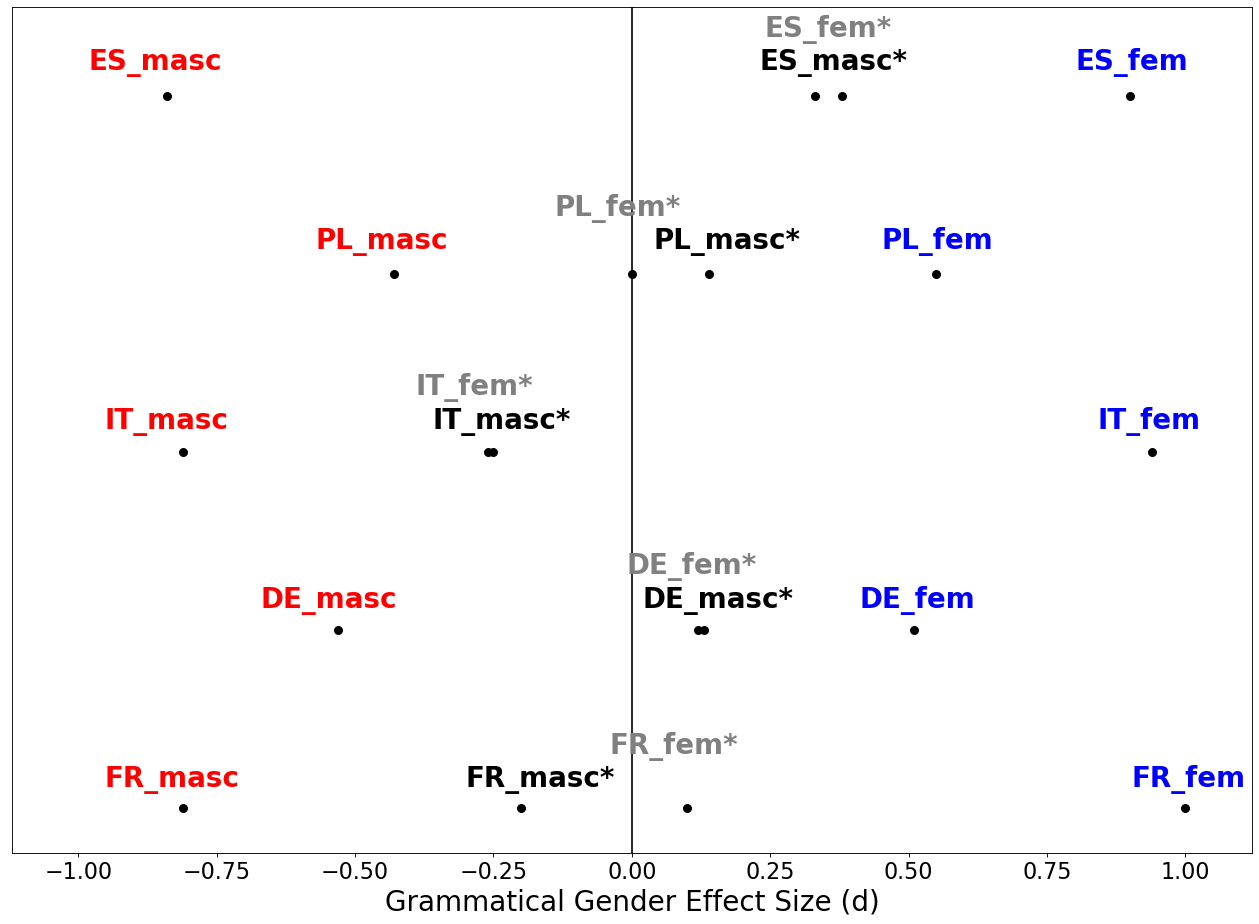

In [53]:
my_scores = [[-0.81, -0.20, 1, 0.1], [-0.53, 0.12, 0.51, 0.13], [-0.81, -0.26, 0.94, -0.25], [-0.43,0.14, 0.55, 0], [-0.84, 0.33, 0.90, 0.38]]
all_groups = [["FR_masc","FR_fem"], 
             ["DE_masc","DE_fem"],
             ["IT_masc","IT_fem"],
             ["PL_masc","PL_fem"],
             ["ES_masc","ES_fem"]]

import matplotlib.pyplot as plt

x_coords = []
y_coords = []
for i in range(5):
    y_coords.append(i)
    y_coords.append(i)
    y_coords.append(i)
    y_coords.append(i)
word_labels = []
count = 0
for scores, words in zip(my_scores, all_groups):
    # first word is masculine before
    x_coords.append(scores[0])
    # second word is masculine after
    x_coords.append(scores[1])
    # third word is feminine before
    x_coords.append(scores[2])
    # fourth word is feminine after
    x_coords.append(scores[3])
    
    word_labels.append(words[0])
    word_labels.append(words[0]+'*')
    word_labels.append(words[1])
    word_labels.append(words[1]+'*')
    
# display scatter plot
fig=plt.figure(figsize=(20, 14), dpi=80)
#ax = plt.subplot(111,aspect = 'equal')
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.scatter(x_coords, y_coords, marker='o',c='k',s=50)
for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
    if k % 4 == 0:
        color = 'red'
        plt.annotate(label, xy=(x, y), xytext=(x-70, y+20), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
    elif k % 4 == 1:
        color = 'black'
        plt.annotate(label, xy=(x, y), xytext=(x-50, y+20), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
    elif k% 4 == 2:
        color = 'blue'
        plt.annotate(label, xy=(x, y), xytext=(x-50, y+20), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
        continue
    elif k%4 == 3:
        color = 'gray'
        plt.annotate(label, xy=(x, y), xytext=(x-70, y+50), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
        continue
  

plt.xlim(-1 - 0.12, 1 + 0.12)
plt.ylim(0 - 0.25, 4 + 0.5)
plt.tick_params(labelsize=20)
plt.xlabel('Grammatical Gender Effect Size (d)', fontsize=25)
    
#plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks([])
plt.margins(tight=True)

plt.show()

fig.savefig('sc-gg.pdf',bbox_inches='tight')
